In [382]:
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt

from datetime import date as dt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

import pickle

In [383]:
pd.set_option('display.max_columns',None)
df = pd.read_csv('./listings.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,138592,Home in San Francisco · ★4.91 · 4 bedrooms · 4...,648553,Julie & Brad,NaN,Noe Valley,37.75635,-122.42864,Entire home/apt,1250,5,34,2023-08-18,0.23,1,80,2,Pending Application
1,474107,Home in San Francisco · ★4.91 · 2 bedrooms · 2...,2318089,Inés,NaN,Excelsior,37.72369,-122.42865,Private room,79,2,149,2023-11-14,1.92,1,196,20,STR-0007772
2,487019,Rental unit in San Francisco · ★4.53 · 3 bedro...,2410550,Cecile,NaN,Potrero Hill,37.75622,-122.39821,Entire home/apt,249,5,36,2023-07-18,0.26,1,202,7,STR-0001599
3,487499,Rental unit in San Francisco · ★4.78 · 1 bedro...,1682183,Daniel,NaN,Mission,37.75884,-122.42232,Entire home/apt,125,30,196,2023-11-04,1.41,1,149,4,NaN
4,1163946,Condo in San Francisco · 2 bedrooms · 2 beds ·...,1918239,Jen,NaN,Mission,37.76111,-122.42082,Entire home/apt,70,30,2,2016-10-07,0.02,1,0,0,NaN


In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8056 entries, 0 to 8055
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              8056 non-null   int64  
 1   name                            8056 non-null   object 
 2   host_id                         8056 non-null   int64  
 3   host_name                       8055 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   8056 non-null   object 
 6   latitude                        8056 non-null   float64
 7   longitude                       8056 non-null   float64
 8   room_type                       8056 non-null   object 
 9   price                           8056 non-null   int64  
 10  minimum_nights                  8056 non-null   int64  
 11  number_of_reviews               8056 non-null   int64  
 12  last_review                     61

In [385]:
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,8.056000e+03,8.056000e+03,0.0,8056.000000,8056.000000,8056.000000,8056.000000,8056.000000,6172.000000,8056.000000,8056.000000,8056.000000
mean,3.092664e+17,1.478669e+08,NaN,37.769002,-122.430103,392.071003,20.613704,47.044315,1.308681,23.931231,177.644613,9.261544
std,4.133426e+17,1.780674e+08,NaN,0.023135,0.027098,2182.756993,48.643332,98.818437,1.839152,54.417781,136.047253,19.334341
min,9.580000e+02,1.169000e+03,NaN,37.708480,-122.512460,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.171546e+07,6.990632e+06,NaN,37.753880,-122.442383,95.000000,2.000000,1.000000,0.190000,1.000000,33.000000,0.000000
50%,4.500022e+07,5.578278e+07,NaN,37.774207,-122.422381,145.000000,3.000000,7.000000,0.560000,3.000000,176.000000,1.000000
75%,7.630646e+17,2.635022e+08,NaN,37.787865,-122.411020,249.000000,30.000000,44.000000,1.810000,12.000000,318.000000,8.000000
max,1.037699e+18,5.490278e+08,NaN,37.809810,-122.358480,50000.000000,1125.000000,1134.000000,35.880000,249.000000,365.000000,426.000000


In [386]:
df.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            1
neighbourhood_group               8056
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1884
reviews_per_month                 1884
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           2965
dtype: int64

In [387]:
df.drop(columns=['neighbourhood_group'],inplace=True)
df.tail()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
8051,1037055202945766181,Rental unit in San Francisco · ★New · 1 bedroo...,549017117,Zafer,Russian Hill,37.796160,-122.423440,Entire home/apt,135,30,0,NaN,NaN,1,262,0,NaN
8052,1037110162116733371,Home in San Francisco · ★New · 5 bedrooms · 5 ...,549027756,Nazanina,South of Market,37.771436,-122.412363,Entire home/apt,213,30,0,NaN,NaN,1,269,0,Exempt
8053,1037350262563555640,Rental unit in San Francisco · ★New · 1 bedroo...,52178915,Jim,Russian Hill,37.806420,-122.421540,Entire home/apt,124,2,0,NaN,NaN,48,5,0,Exempt
8054,1037357504491632173,Rental unit in San Francisco · ★New · 1 bedroo...,52178915,Jim,Russian Hill,37.804671,-122.421766,Entire home/apt,124,2,0,NaN,NaN,48,5,0,Exempt
8055,1037698639691641139,Rental unit in San Francisco · ★New · 1 bedroo...,161769990,William,Inner Richmond,37.775939,-122.467666,Entire home/apt,87,30,0,NaN,NaN,1,263,0,NaN


In [388]:
df.dropna(inplace=True)
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
dtype: int64

In [389]:
df.duplicated().value_counts()

False    4189
Name: count, dtype: int64

In [390]:
df['last_review']=pd.to_datetime(df['last_review'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4189 entries, 0 to 7986
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              4189 non-null   int64         
 1   name                            4189 non-null   object        
 2   host_id                         4189 non-null   int64         
 3   host_name                       4189 non-null   object        
 4   neighbourhood                   4189 non-null   object        
 5   latitude                        4189 non-null   float64       
 6   longitude                       4189 non-null   float64       
 7   room_type                       4189 non-null   object        
 8   price                           4189 non-null   int64         
 9   minimum_nights                  4189 non-null   int64         
 10  number_of_reviews               4189 non-null   int64         
 11  last_revi

In [391]:
df['days_since_last_review'] = (pd.to_datetime(dt.today()) - df['last_review']).dt.days
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,days_since_last_review
0,138592,Home in San Francisco · ★4.91 · 4 bedrooms · 4...,648553,Julie & Brad,Noe Valley,37.75635,-122.42864,Entire home/apt,1250,5,34,2023-08-18,0.23,1,80,2,Pending Application,145
1,474107,Home in San Francisco · ★4.91 · 2 bedrooms · 2...,2318089,Inés,Excelsior,37.72369,-122.42865,Private room,79,2,149,2023-11-14,1.92,1,196,20,STR-0007772,57
2,487019,Rental unit in San Francisco · ★4.53 · 3 bedro...,2410550,Cecile,Potrero Hill,37.75622,-122.39821,Entire home/apt,249,5,36,2023-07-18,0.26,1,202,7,STR-0001599,176
5,1174701,Rental unit in San Francisco · 1 bedroom · 1 b...,6429436,Janette,Russian Hill,37.80673,-122.41998,Entire home/apt,271,2,1,2023-07-17,0.21,9,361,1,Exempt,177
8,1550913,Guest suite in San Francisco · ★4.87 · 1 bedro...,497158,Seth And Alexa,Mission,37.75141,-122.41980,Entire home/apt,150,5,234,2023-10-11,1.88,1,52,15,STR-0000051,91


In [392]:
df['minimum_amount_spent'] = df['price'] * df['minimum_nights']
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,days_since_last_review,minimum_amount_spent
0,138592,Home in San Francisco · ★4.91 · 4 bedrooms · 4...,648553,Julie & Brad,Noe Valley,37.75635,-122.42864,Entire home/apt,1250,5,34,2023-08-18,0.23,1,80,2,Pending Application,145,6250
1,474107,Home in San Francisco · ★4.91 · 2 bedrooms · 2...,2318089,Inés,Excelsior,37.72369,-122.42865,Private room,79,2,149,2023-11-14,1.92,1,196,20,STR-0007772,57,158
2,487019,Rental unit in San Francisco · ★4.53 · 3 bedro...,2410550,Cecile,Potrero Hill,37.75622,-122.39821,Entire home/apt,249,5,36,2023-07-18,0.26,1,202,7,STR-0001599,176,1245
5,1174701,Rental unit in San Francisco · 1 bedroom · 1 b...,6429436,Janette,Russian Hill,37.80673,-122.41998,Entire home/apt,271,2,1,2023-07-17,0.21,9,361,1,Exempt,177,542
8,1550913,Guest suite in San Francisco · ★4.87 · 1 bedro...,497158,Seth And Alexa,Mission,37.75141,-122.41980,Entire home/apt,150,5,234,2023-10-11,1.88,1,52,15,STR-0000051,91,750


In [393]:
df['rating_score'] = df['number_of_reviews'] / df['days_since_last_review']

In [394]:
df['neighbourhood'].nunique()

36

Text(0.5, 1.0, 'outliers for price')

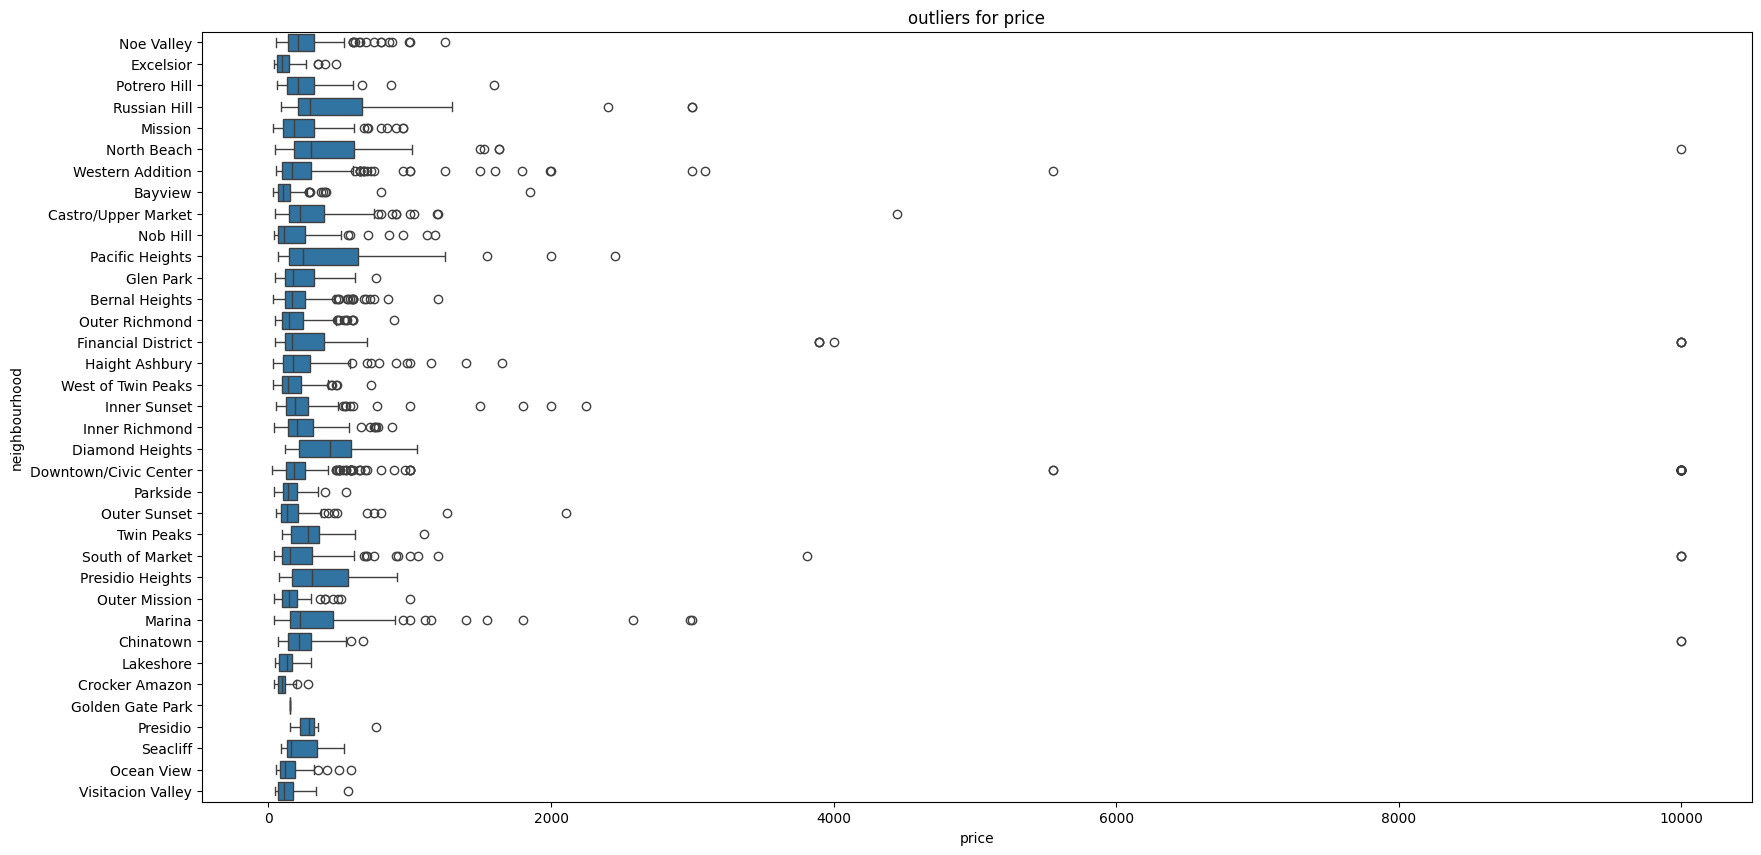

In [395]:
ax = plt.figure(figsize=(20,10))
sns.boxplot(x=df['price'],y=df['neighbourhood'])
plt.title('outliers for price')

In [396]:
df.drop(df[df['price'] == 10000].index,inplace=True)

<Axes: xlabel='minimum_nights', ylabel='neighbourhood'>

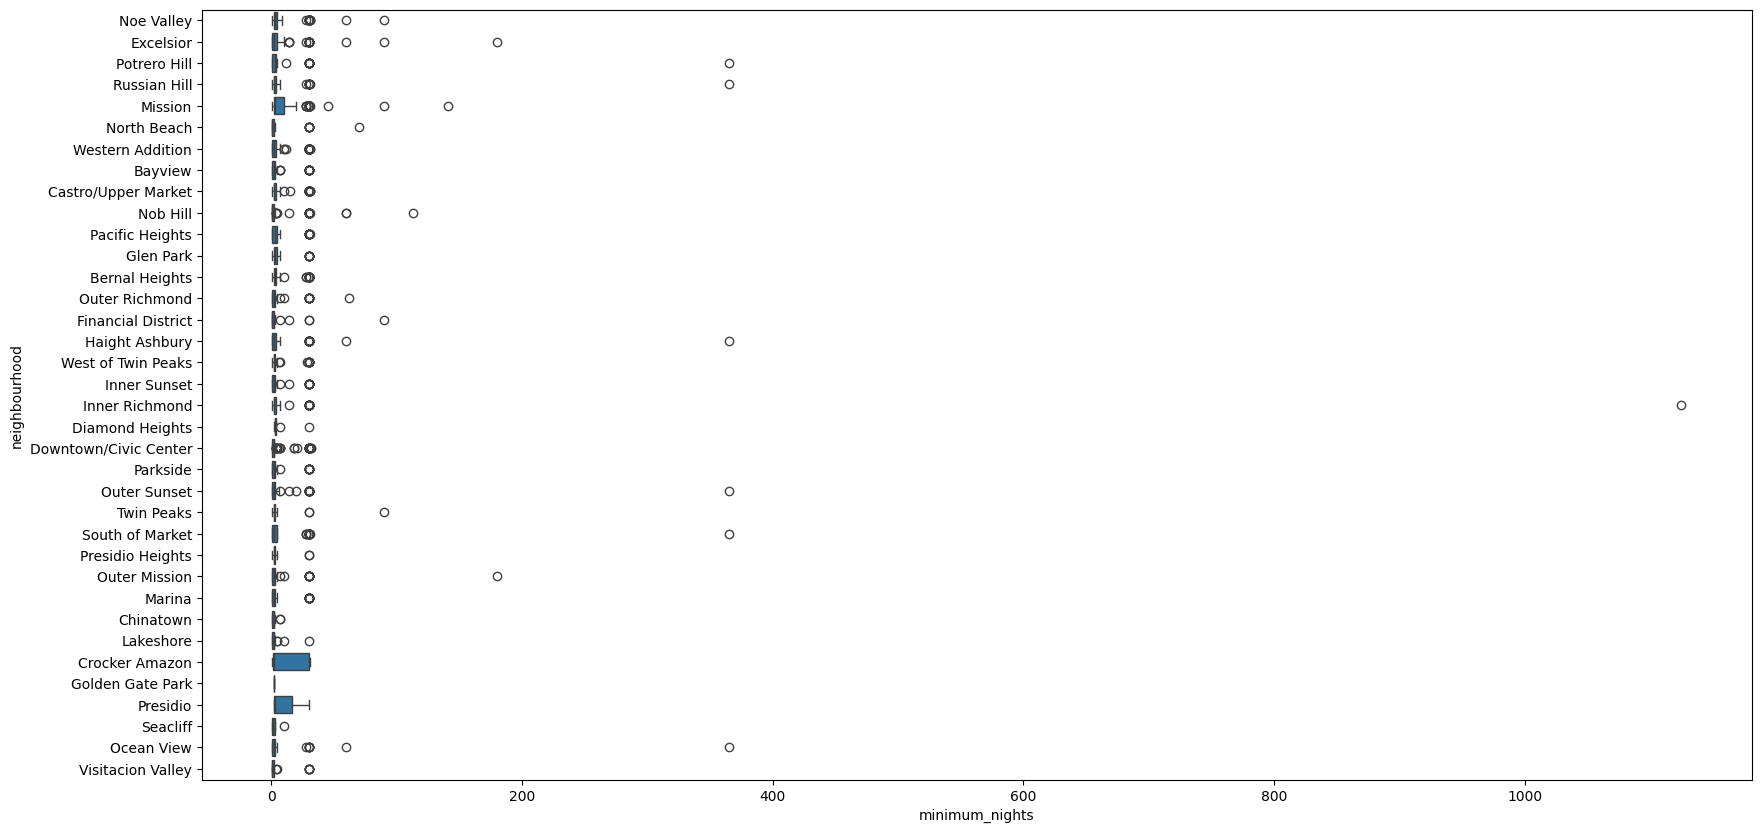

In [397]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df['minimum_nights'],y=df['neighbourhood'])

In [398]:
df.drop(df[df['minimum_nights'] > 366].index, inplace=True)

<Axes: xlabel='number_of_reviews', ylabel='neighbourhood'>

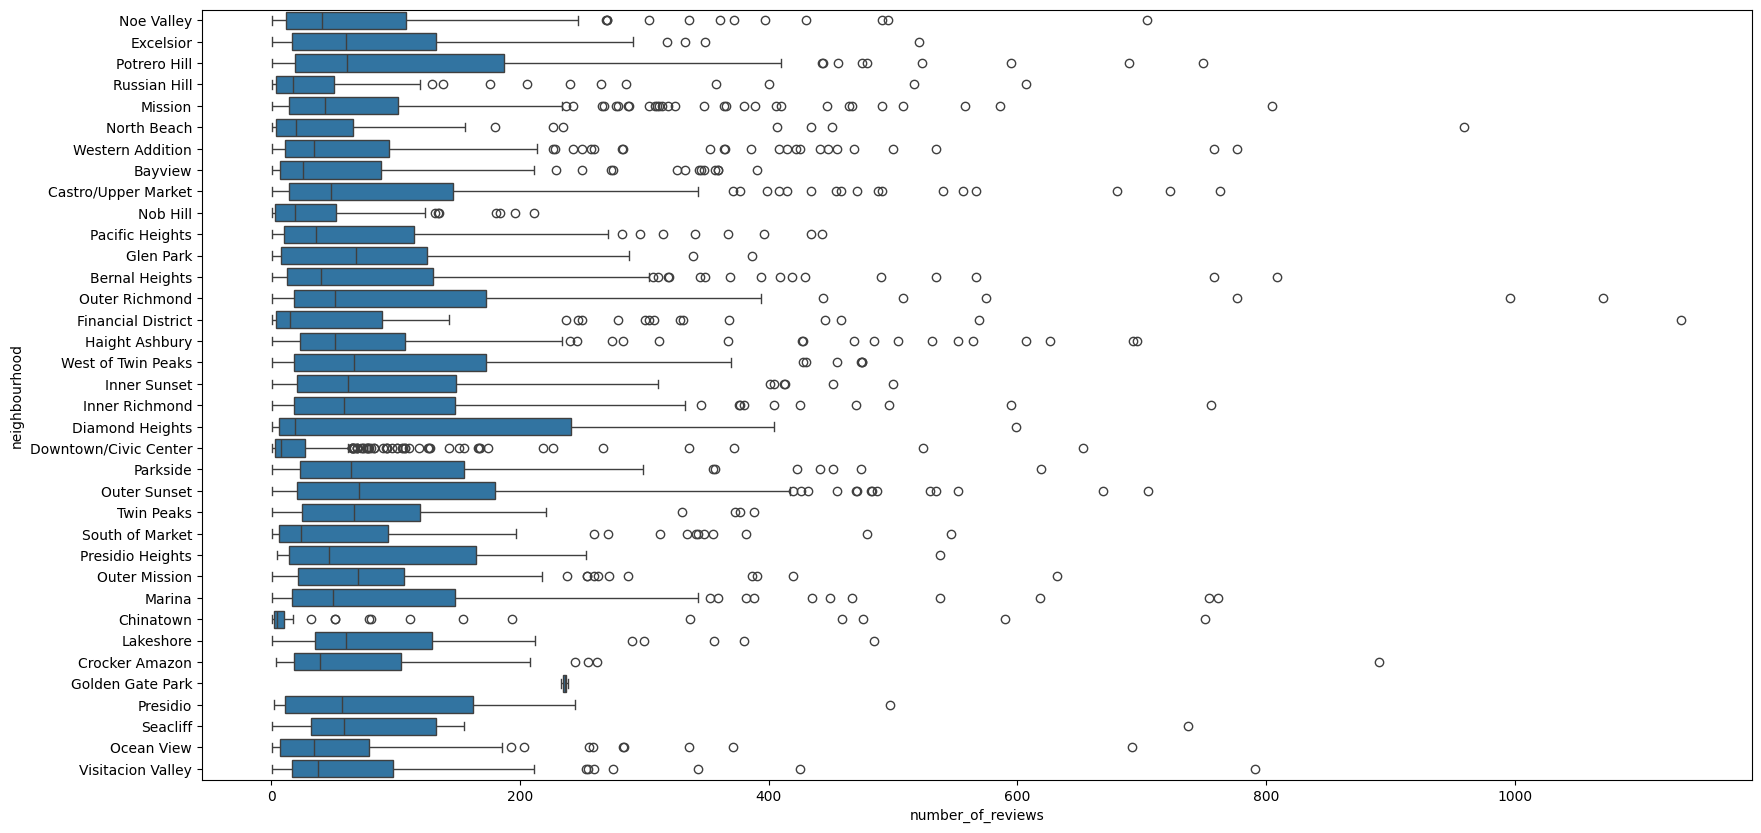

In [399]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df['number_of_reviews'],y=df['neighbourhood'])

In [400]:
df[df['number_of_reviews'] > 800]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,days_since_last_review,minimum_amount_spent,rating_score
16,8739,Condo in San Francisco · ★4.92 · 1 bedroom · 1...,7149,Ivan & Wendy,Mission,37.76030,-122.42197,Private room,122,1,805,2023-11-12,4.61,2,0,44,STR-0000028,59,122,13.644068
183,545685,Guest suite in San Francisco · ★4.82 · 1 bedro...,2676602,Su,Outer Richmond,37.77502,-122.48035,Entire home/apt,79,2,1071,2023-11-30,7.69,2,114,93,STR-0004160,41,158,26.121951
192,585326,Guest suite in San Francisco · ★4.80 · 1 bedro...,2676602,Su,Outer Richmond,37.77547,-122.48116,Entire home/apt,89,1,996,2023-11-29,7.18,2,0,99,STR-0004160,42,89,23.714286
714,4464347,Bed and breakfast in San Francisco · ★4.75 · 1...,22931450,Sarah,North Beach,37.79821,-122.40521,Shared room,45,1,959,2023-11-30,8.70,4,298,354,933345.0,41,45,23.390244
1041,8356380,Guesthouse in San Francisco · ★4.94 · 1 bedroo...,44046204,Cheryl,Crocker Amazon,37.71329,-122.43633,Entire home/apt,101,1,891,2023-12-01,9.16,1,164,119,STR-0000771,40,101,22.275000
1449,14804950,Guest suite in San Francisco · ★4.89 · Studio ...,24949158,Angela,Bernal Heights,37.74486,-122.41814,Entire home/apt,91,1,809,2023-11-26,9.32,1,62,113,STR-0002030,45,91,17.977778
3118,35642179,Boutique hotel in San Francisco · ★4.25 · 1 be...,265029065,Grant Plaza,Financial District,37.79035,-122.40619,Hotel room,106,1,1134,2023-12-03,21.65,3,0,300,License not needed per OSTR,38,106,29.842105


<Axes: xlabel='availability_365', ylabel='neighbourhood'>

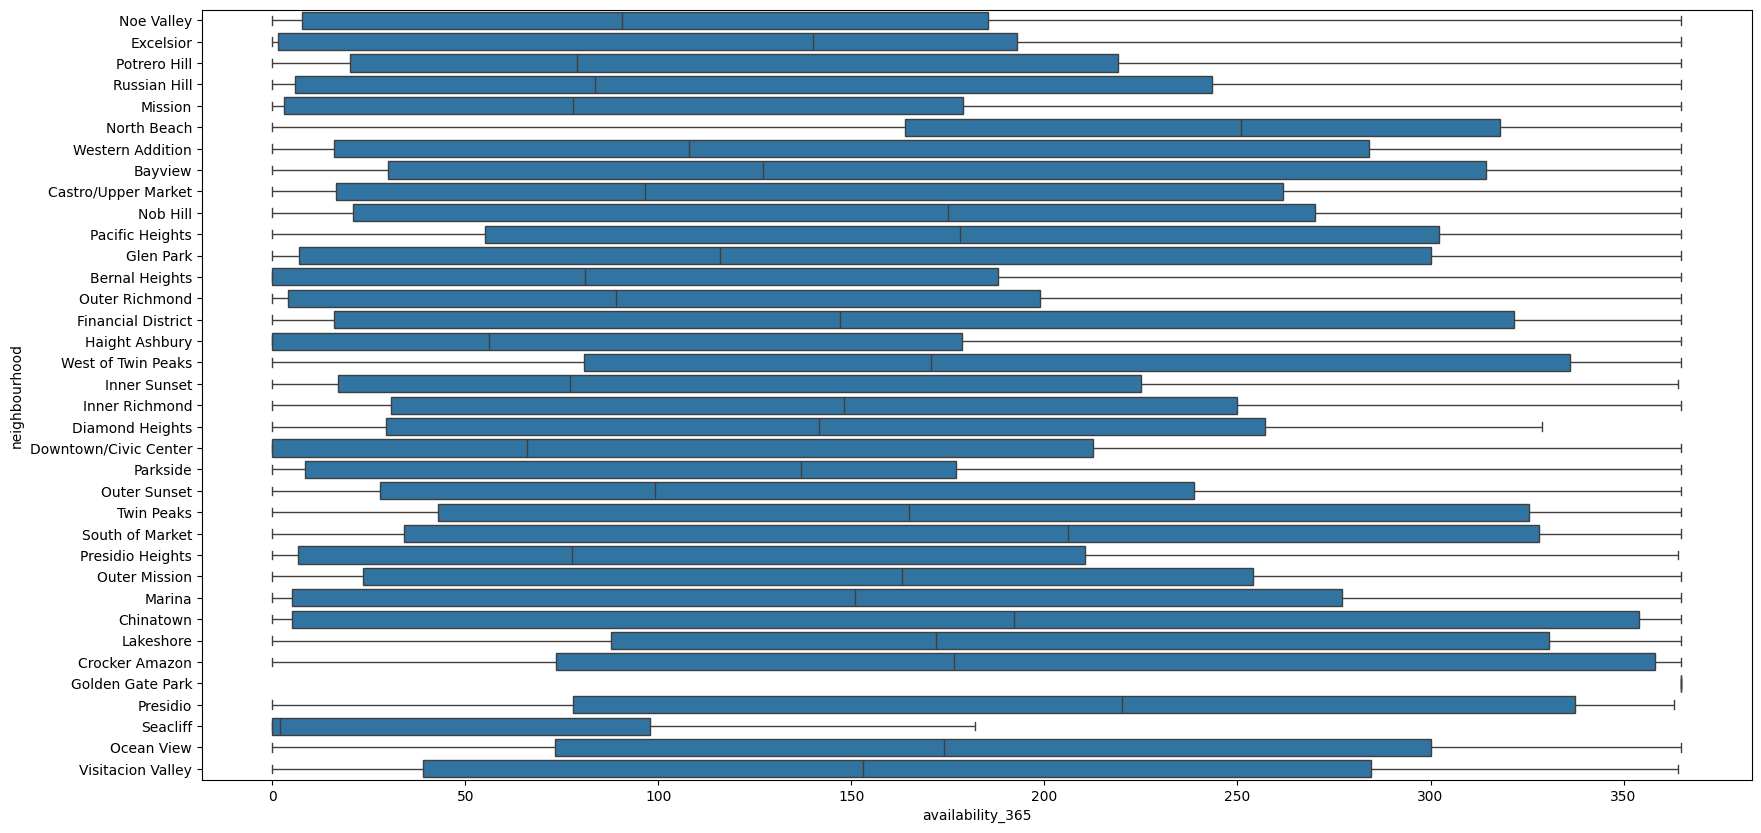

In [401]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df['availability_365'],y=df['neighbourhood'])

In [402]:
df0 = df.groupby(['neighbourhood','room_type'],as_index=False).agg({'price':'mean','id':'count','number_of_reviews':'mean','minimum_nights':'mean','availability_365':'mean','days_since_last_review':'mean','minimum_amount_spent':'mean','rating_score':'mean','latitude':'mean','longitude':'mean','calculated_host_listings_count':'mean','number_of_reviews_ltm':'mean','reviews_per_month':'mean'})
df0.rename(columns={'id':'num_of_listings'},inplace=True)
df0.head()

,neighbourhood,room_type,price,num_of_listings,number_of_reviews,minimum_nights,availability_365,days_since_last_review,minimum_amount_spent,rating_score,latitude,longitude,calculated_host_listings_count,number_of_reviews_ltm,reviews_per_month
0,Bayview,Entire home/apt,209.724138,58,74.862069,4.586207,140.862069,189.913793,888.551724,1.267445,37.732334,-122.392525,1.879310,17.758621,1.983103
1,Bayview,Private room,70.340000,50,67.700000,6.160000,179.120000,174.260000,346.740000,1.184548,37.729144,-122.392907,4.420000,18.900000,2.103200
2,Bernal Heights,Entire home/apt,255.093567,171,86.777778,7.578947,126.181287,219.438596,1630.567251,1.405033,37.741614,-122.415286,1.491228,16.046784,1.682339
3,Bernal Heights,Private room,106.738462,65,108.753846,5.430769,117.738462,327.184615,535.984615,1.695754,37.742017,-122.416303,3.261538,13.323077,1.692769
4,Castro/Upper Market,Entire home/apt,363.408451,142,99.852113,9.070423,132.408451,210.028169,2485.528169,1.579891,37.761550,-122.435525,2.169014,17.711268,1.766831


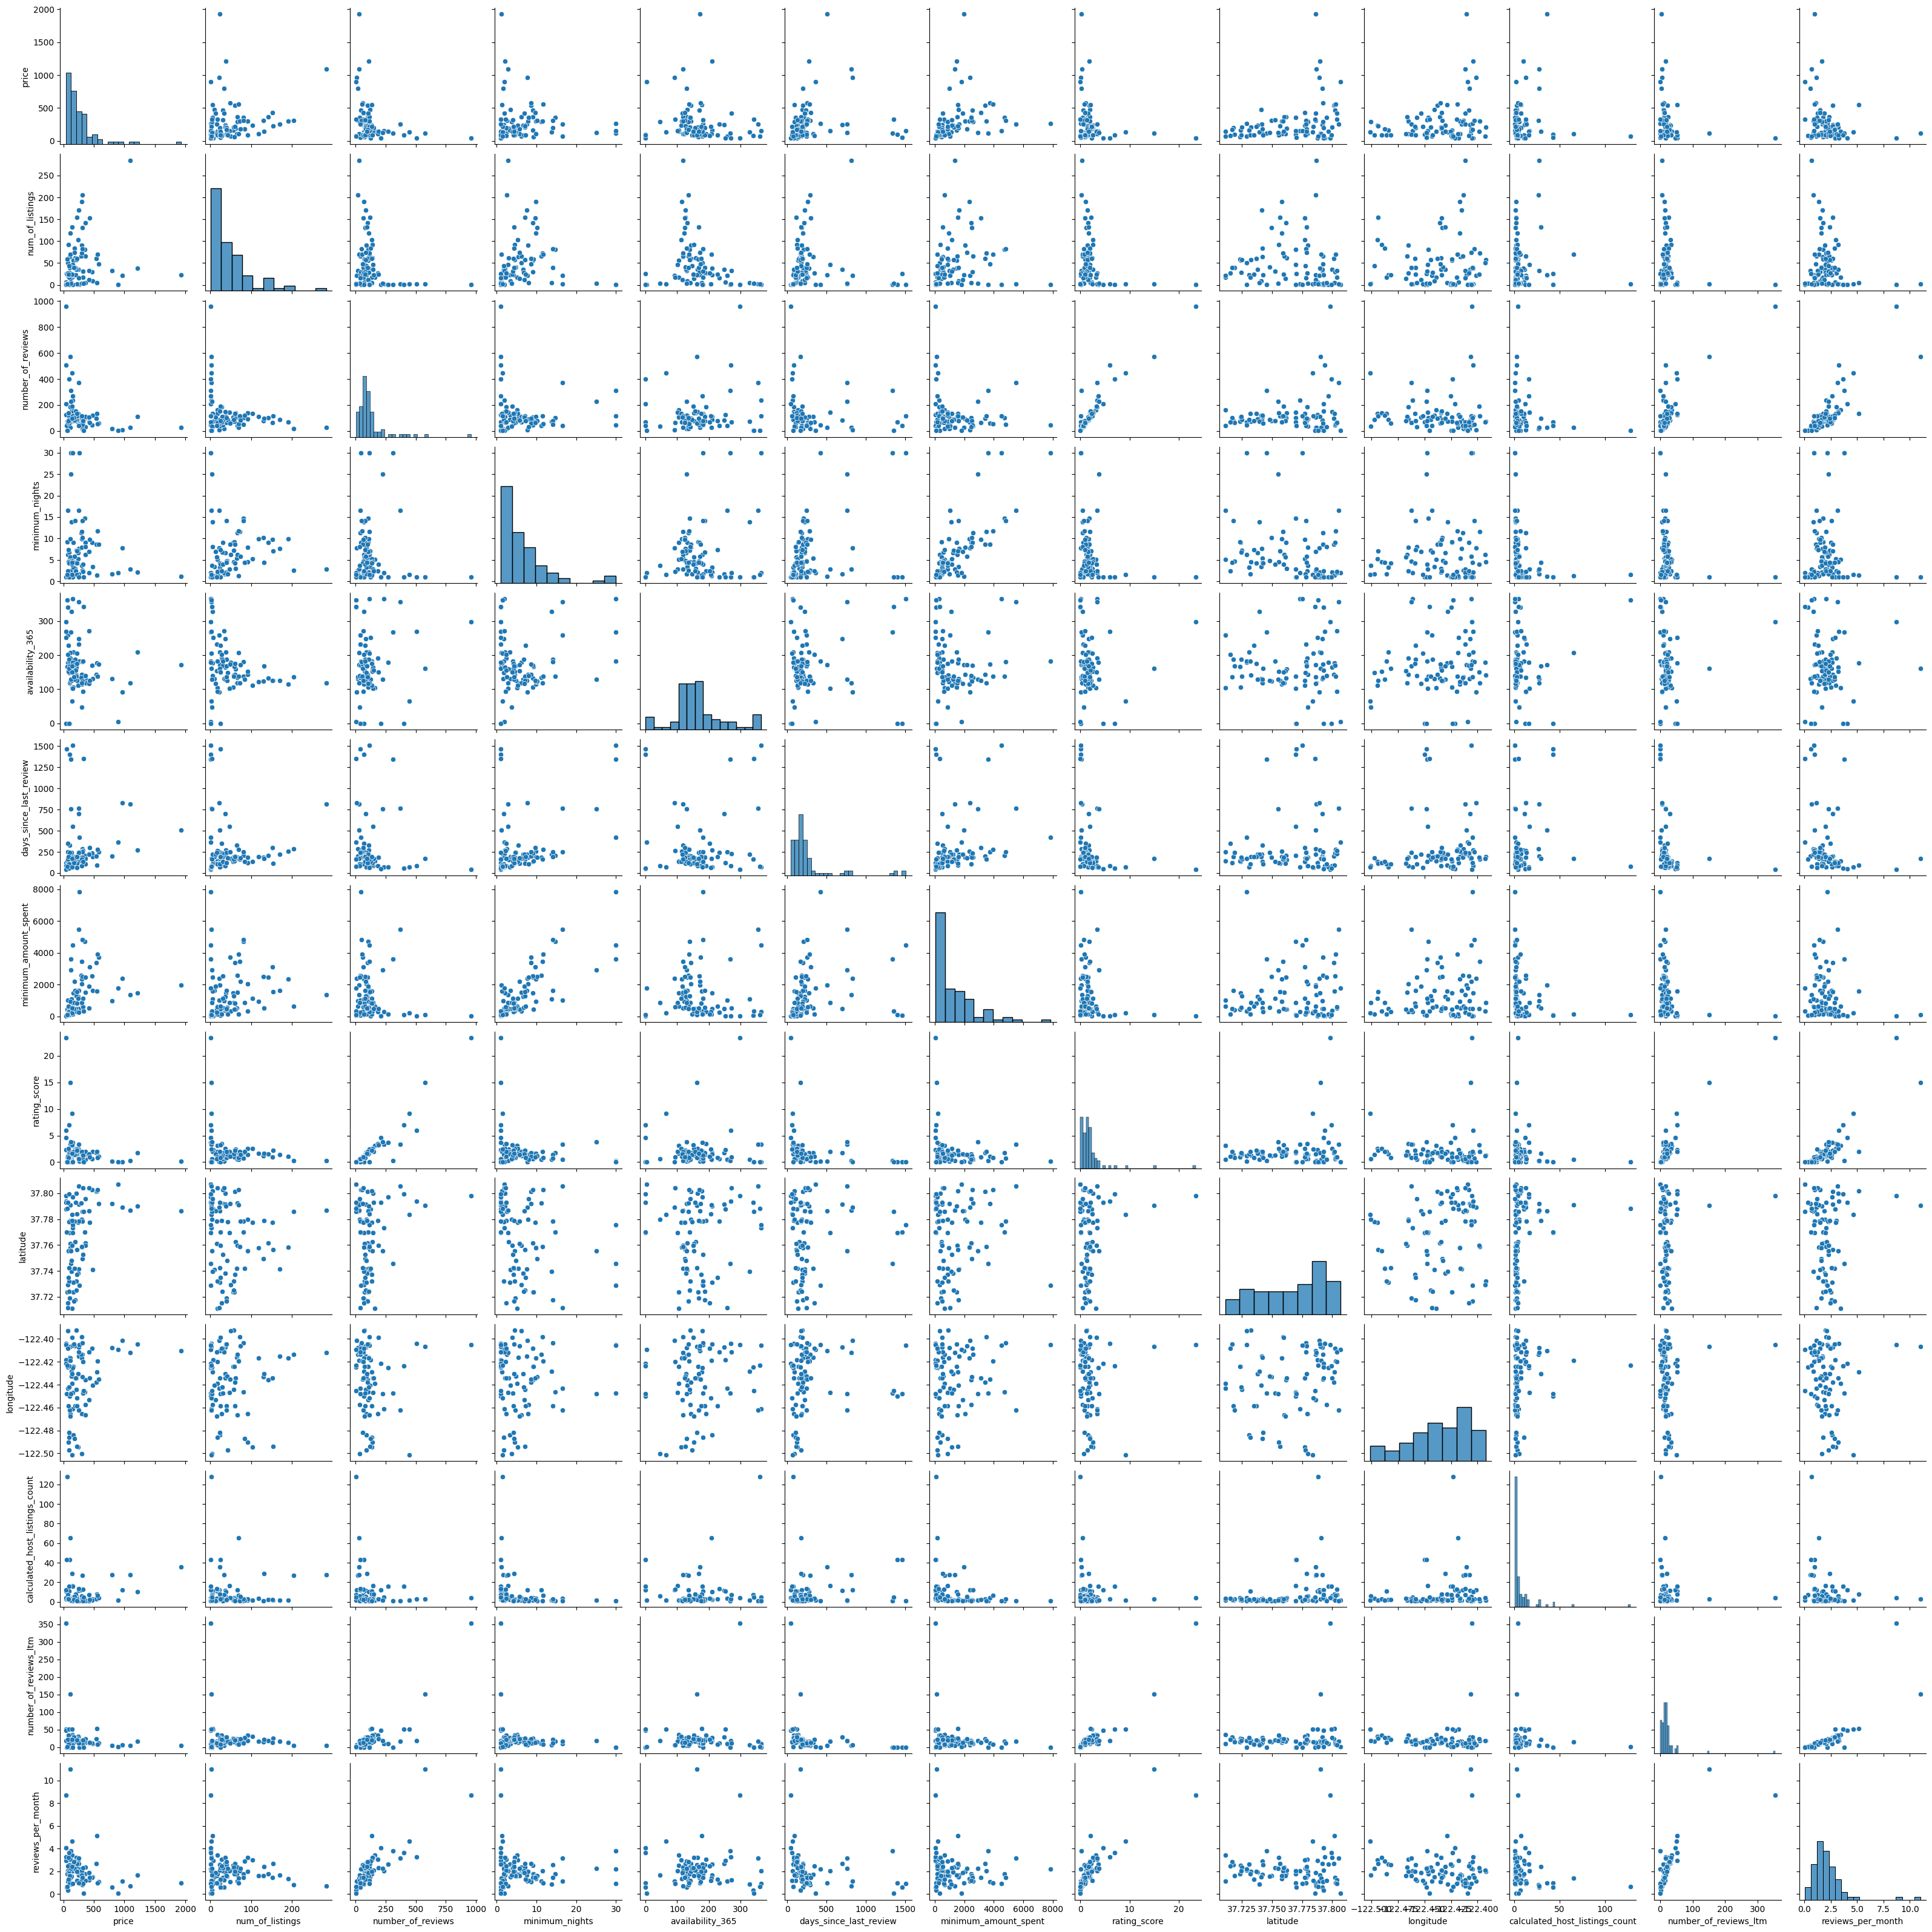

In [403]:
sns.pairplot(df0)

Text(0.5, 1.0, 'average price for each neighbourhood')

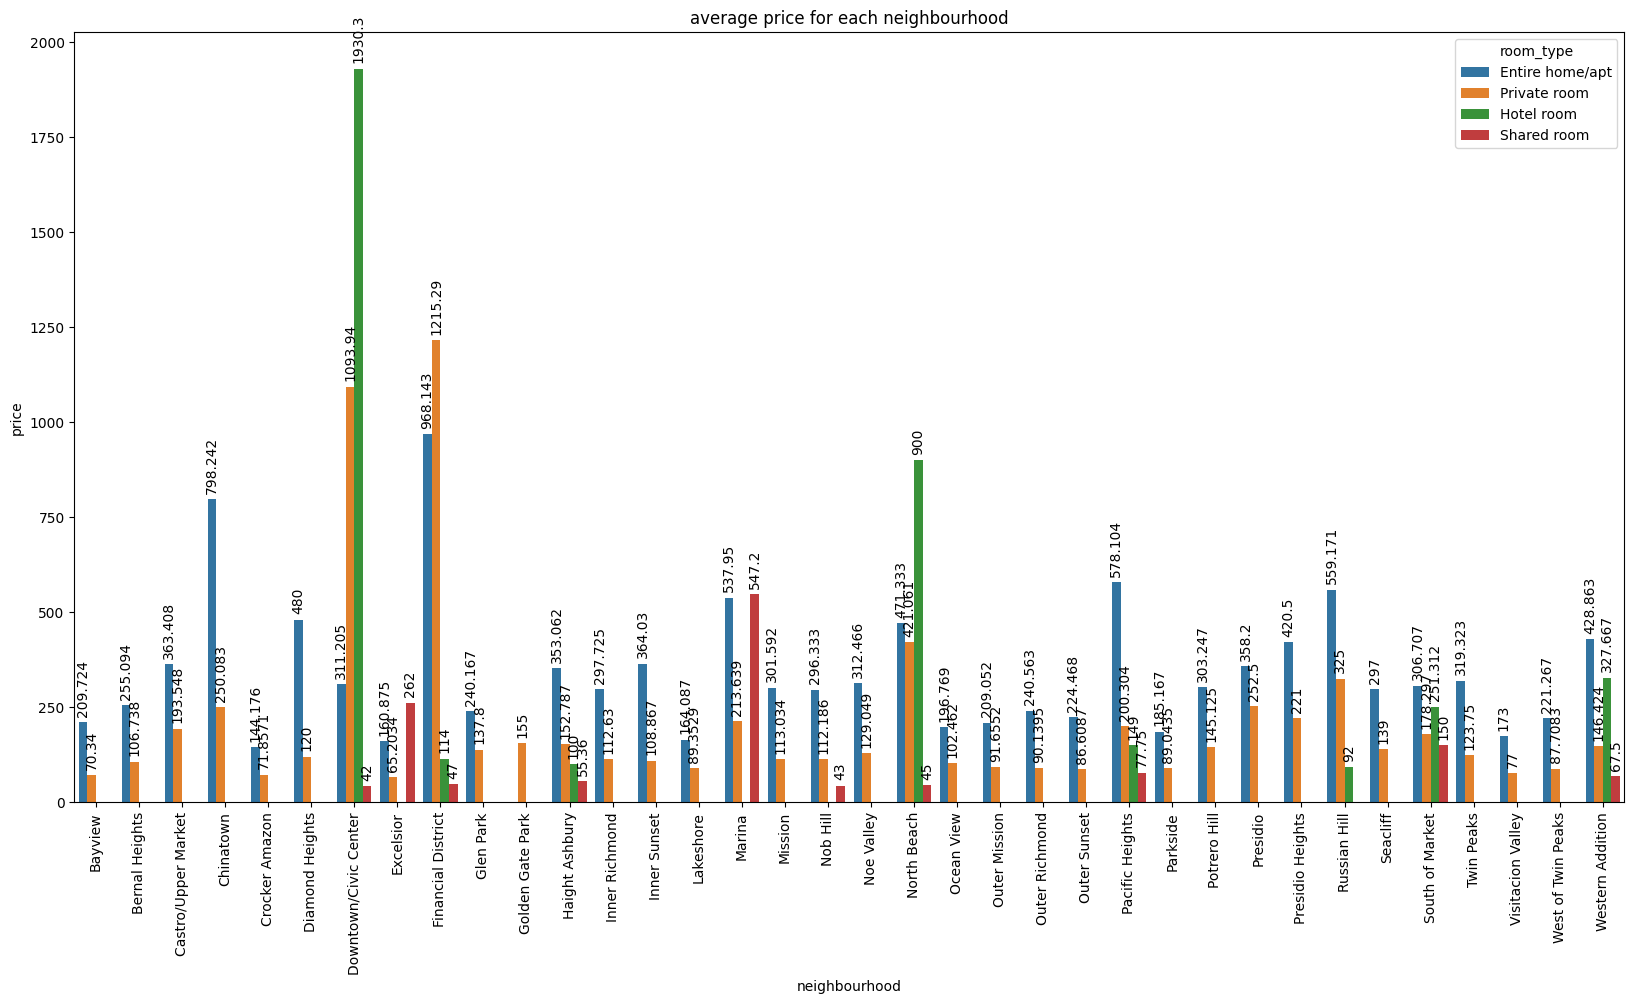

In [404]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x=df0['neighbourhood'],y=df0['price'],hue=df0['room_type'])
for i in range(4):
    ax.bar_label(ax.containers[i],rotation=90,padding=4)
plt.xticks(rotation=90)
plt.title('average price for each neighbourhood')

In [405]:
df[(df['neighbourhood'] == 'Downtown/Civic Center') & (df['room_type'] == 'Hotel room')]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,days_since_last_review,minimum_amount_spent,rating_score
916,6883183,Serviced apartment in San Francisco · ★4.91 · ...,23593310,Meimei,Downtown/Civic Center,37.787290,-122.409280,Hotel room,250,2,34,2023-11-05,0.34,1,274,1,License not needed per OSTR,66,500,0.515152
2161,23271377,Boutique hotel in San Francisco · ★4.13 · Stud...,173206762,Stratford,Downtown/Civic Center,37.786690,-122.408820,Hotel room,128,1,8,2022-09-04,0.14,61,198,0,1083521,493,128,0.016227
2162,23271459,Boutique hotel in San Francisco · ★4.0 · Studi...,173206762,Stratford,Downtown/Civic Center,37.787450,-122.407140,Hotel room,9999,1,3,2020-02-16,0.05,61,199,0,1083521,1424,9999,0.002107
2180,23312390,Boutique hotel in San Francisco · ★4.30 · Stud...,173206762,Stratford,Downtown/Civic Center,37.786750,-122.409050,Hotel room,128,1,23,2020-02-25,0.34,61,198,0,1083521,1415,128,0.016254
2182,23312525,Boutique hotel in San Francisco · ★4.29 · Stud...,173206762,Stratford,Downtown/Civic Center,37.785980,-122.408450,Hotel room,9999,1,28,2020-02-28,0.40,61,199,0,1083521,1412,9999,0.019830
2185,23312644,Boutique hotel in San Francisco · ★4.38 · Stud...,173206762,Stratford,Downtown/Civic Center,37.786340,-122.407170,Hotel room,128,1,16,2022-09-12,0.23,61,198,0,1083521,485,128,0.032990
2191,23312854,Boutique hotel in San Francisco · ★4.0 · Studi...,173206762,Stratford,Downtown/Civic Center,37.785850,-122.407300,Hotel room,128,1,4,2022-09-10,0.07,61,198,0,1083521,487,128,0.008214
2195,23313045,Boutique hotel in San Francisco · ★4.10 · Stud...,173206762,Stratford,Downtown/Civic Center,37.786030,-122.407720,Hotel room,128,1,20,2023-06-21,0.29,61,198,1,1083521,203,128,0.098522
2225,23551086,Boutique hotel in San Francisco · ★4.15 · Stud...,173206762,Stratford,Downtown/Civic Center,37.785960,-122.408560,Hotel room,109,1,33,2022-11-13,0.47,61,198,0,1083521,423,109,0.078014
2226,23551138,Boutique hotel in San Francisco · ★4.10 · Stud...,173206762,Stratford,Downtown/Civic Center,37.785940,-122.407040,Hotel room,109,1,21,2022-09-15,0.31,61,199,0,1083521,482,109,0.043568


In [406]:
df.drop(df[(df['neighbourhood'] == 'Downtown/Civic Center') & (df['room_type'] == 'Hotel room') & (df['price'] == 9999)].index, inplace=True)

In [407]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr
df[(df['price'] > upper_limit) | (df['price'] < lower_limit)]


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,days_since_last_review,minimum_amount_spent,rating_score
0,138592,Home in San Francisco · ★4.91 · 4 bedrooms · 4...,648553,Julie & Brad,Noe Valley,37.756350,-122.428640,Entire home/apt,1250,5,34,2023-08-18,0.23,1,80,2,Pending Application,145,6250,0.234483
15,8339,Condo in San Francisco · ★4.87 · 1 bedroom · 1...,24215,Rosy,Western Addition,37.775640,-122.436420,Entire home/apt,675,5,28,2019-06-28,0.16,2,365,0,STR-0000264,1657,3375,0.016898
84,124011,Home in San Francisco · ★4.96 · 3 bedrooms · 4...,617985,Patrick,Inner Sunset,37.763170,-122.470290,Entire home/apt,580,7,28,2023-09-14,0.25,1,323,6,STR-0001525,118,4060,0.237288
88,137129,Home in San Francisco · 3 bedrooms · 2.5 baths,639671,Mark,Inner Richmond,37.787330,-122.463710,Entire home/apt,572,14,2,2022-07-26,0.04,1,83,0,2022-004098STR,533,8008,0.003752
116,231129,Townhouse in San Francisco · ★4.40 · 1 bedroom...,1208533,Antonio,Nob Hill,37.792780,-122.410070,Entire home/apt,857,2,74,2022-10-23,0.51,6,358,0,City Registration Pending,444,1714,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,955995067181069574,Home in San Francisco · ★5.0 · 4 bedrooms · 5 ...,529515158,Elizabeth,Presidio Heights,37.788954,-122.449929,Entire home/apt,907,2,5,2023-11-25,2.50,1,0,5,2023-007630STR,46,1814,0.108696
7245,963641231270031822,Home in San Francisco · 2 bedrooms · 2 beds · ...,395372745,Blake,Bernal Heights,37.739183,-122.413853,Entire home/apt,599,5,1,2023-11-26,1.00,1,22,1,2023-007687STR,45,2995,0.022222
7283,966976011374731593,Home in San Francisco · ★5.0 · 3 bedrooms · 4 ...,60452615,Nihir,Mission,37.758550,-122.409610,Entire home/apt,707,2,7,2023-11-17,2.36,1,168,7,2023-005515STR,54,1414,0.129630
7339,975388631678738792,Condo in San Francisco · ★5.0 · 1 bedroom · 1 ...,294889302,Adriana,South of Market,37.775557,-122.389595,Entire home/apt,680,1,3,2023-12-03,3.00,1,354,3,2023-008979STR,38,680,0.078947


Text(0.5, 1.0, 'average number of reviews for each neighbourhood')

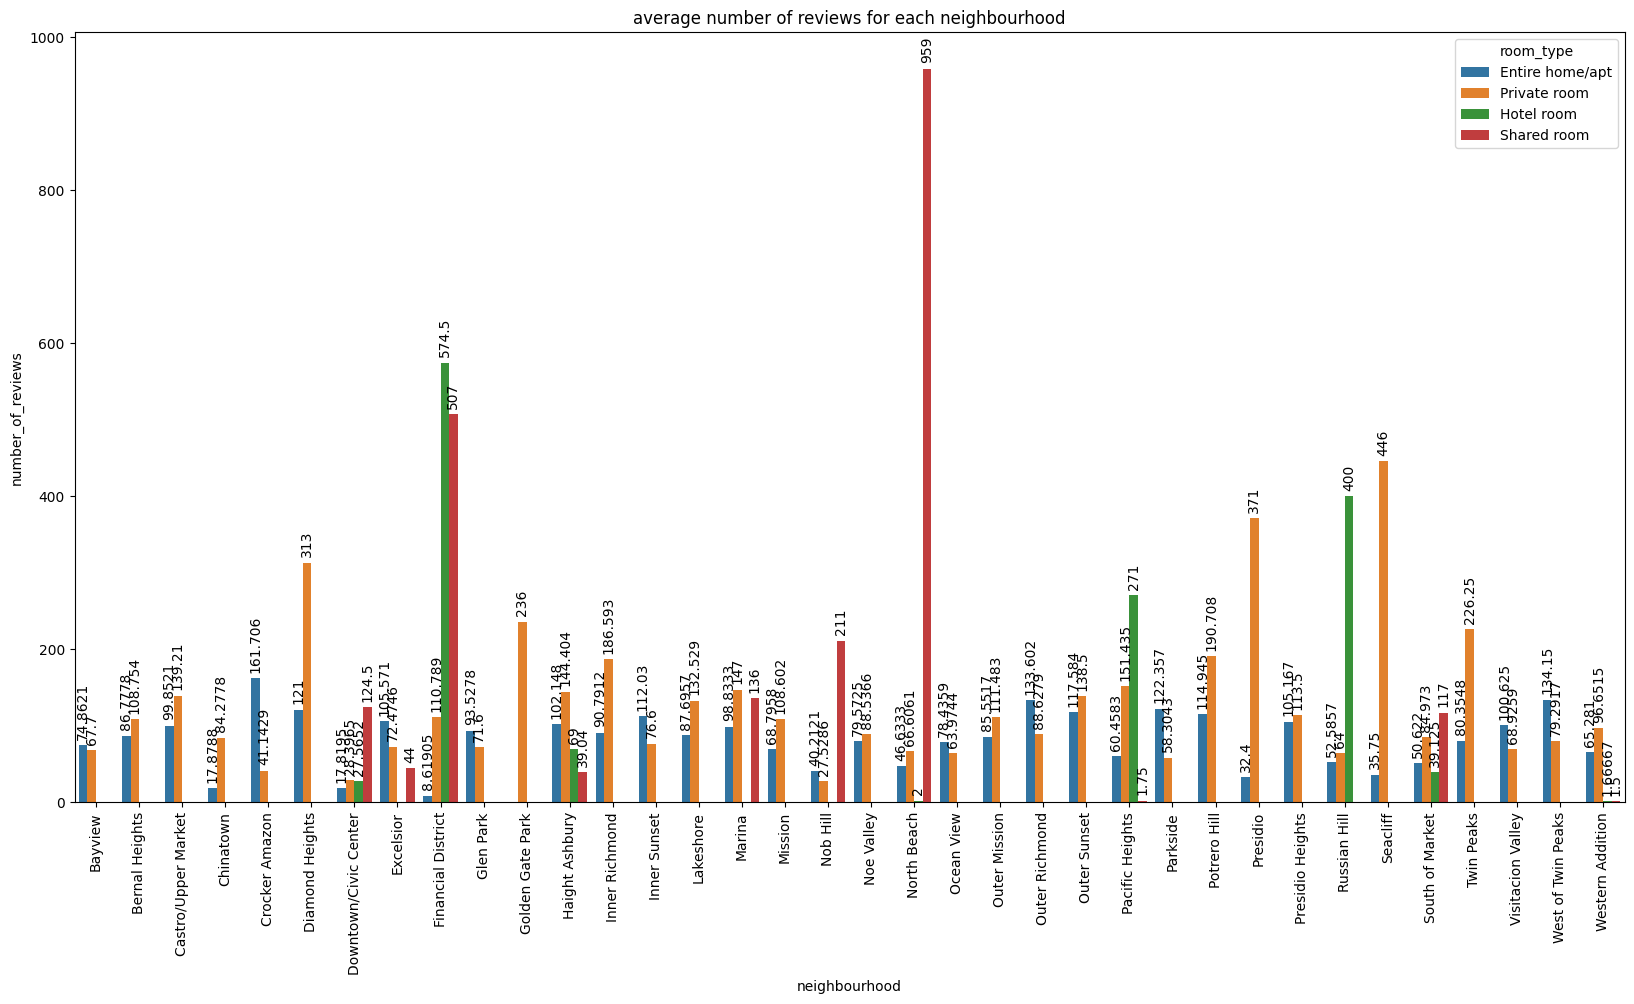

In [408]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x=df0['neighbourhood'],y=df0['number_of_reviews'],hue=df0['room_type'])
for i in range(4):
    ax.bar_label(ax.containers[i],rotation=90,padding=4)
plt.xticks(rotation=90)
plt.title('average number of reviews for each neighbourhood')

In [409]:
df[(df['neighbourhood'] == 'North Beach') & (df['room_type'] == 'Shared room')]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,days_since_last_review,minimum_amount_spent,rating_score
714,4464347,Bed and breakfast in San Francisco · ★4.75 · 1...,22931450,Sarah,North Beach,37.79821,-122.40521,Shared room,45,1,959,2023-11-30,8.7,4,298,354,933345.0,41,45,23.390244


In [410]:
df.drop(df[(df['neighbourhood'] == 'North Beach') & (df['room_type'] == 'Shared room')].index, inplace=True)

Text(0.5, 1.0, 'average minimum number of nights for each neighbourhood')

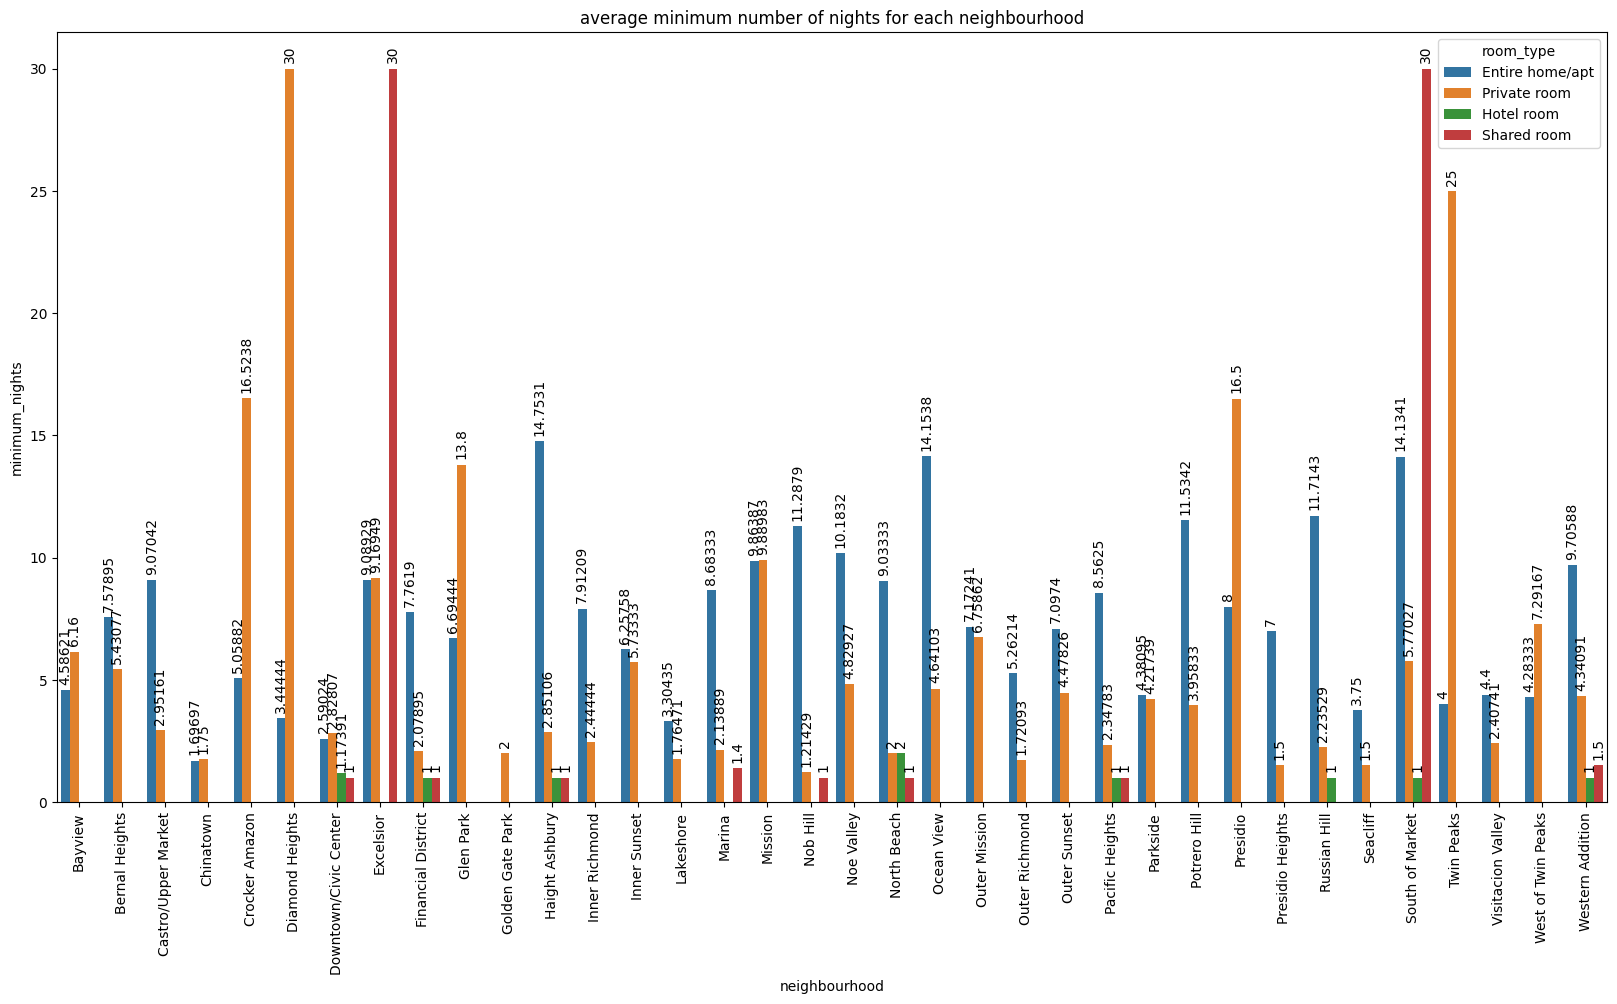

In [411]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x=df0['neighbourhood'],y=df0['minimum_nights'],hue=df0['room_type'])
for i in range(4):
    ax.bar_label(ax.containers[i],rotation=90,padding=4)
plt.xticks(rotation=90)
plt.title('average minimum number of nights for each neighbourhood')

Text(0.5, 1.0, 'average availability throughout the year for each neighbourhood')

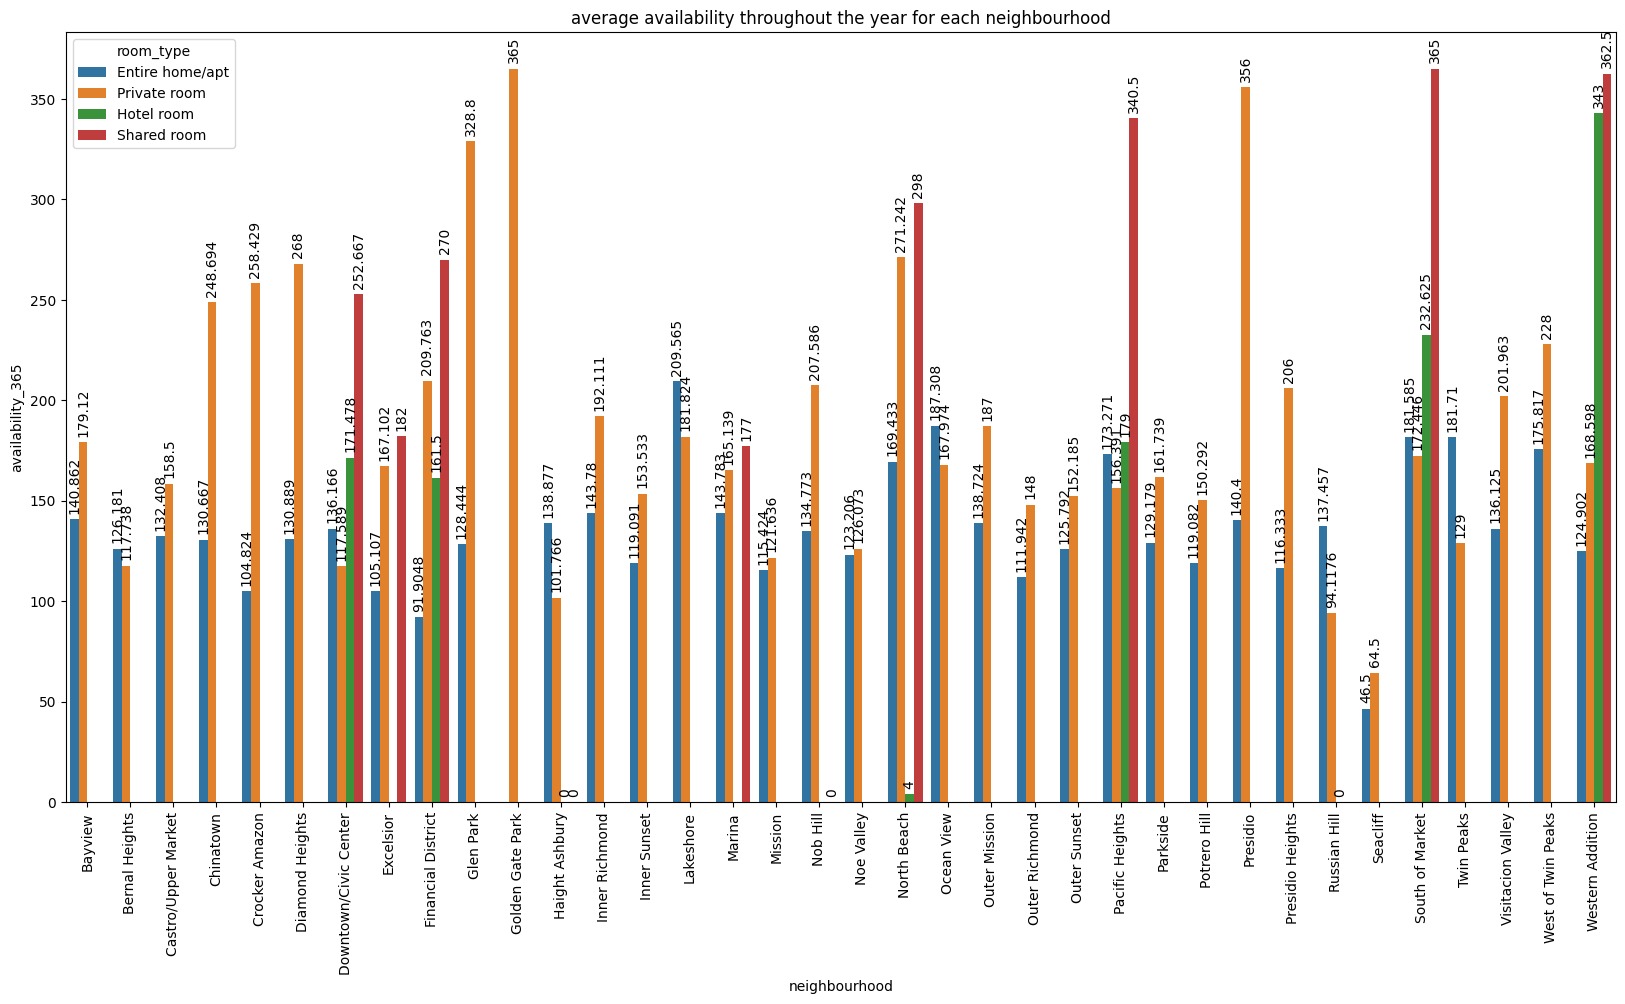

In [412]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x=df0['neighbourhood'],y=df0['availability_365'],hue=df0['room_type'])
for i in range(4):
    ax.bar_label(ax.containers[i],rotation=90,padding=4)
plt.xticks(rotation=90)
plt.title('average availability throughout the year for each neighbourhood')

Text(0.5, 1.0, 'average price for each neighbourhood')

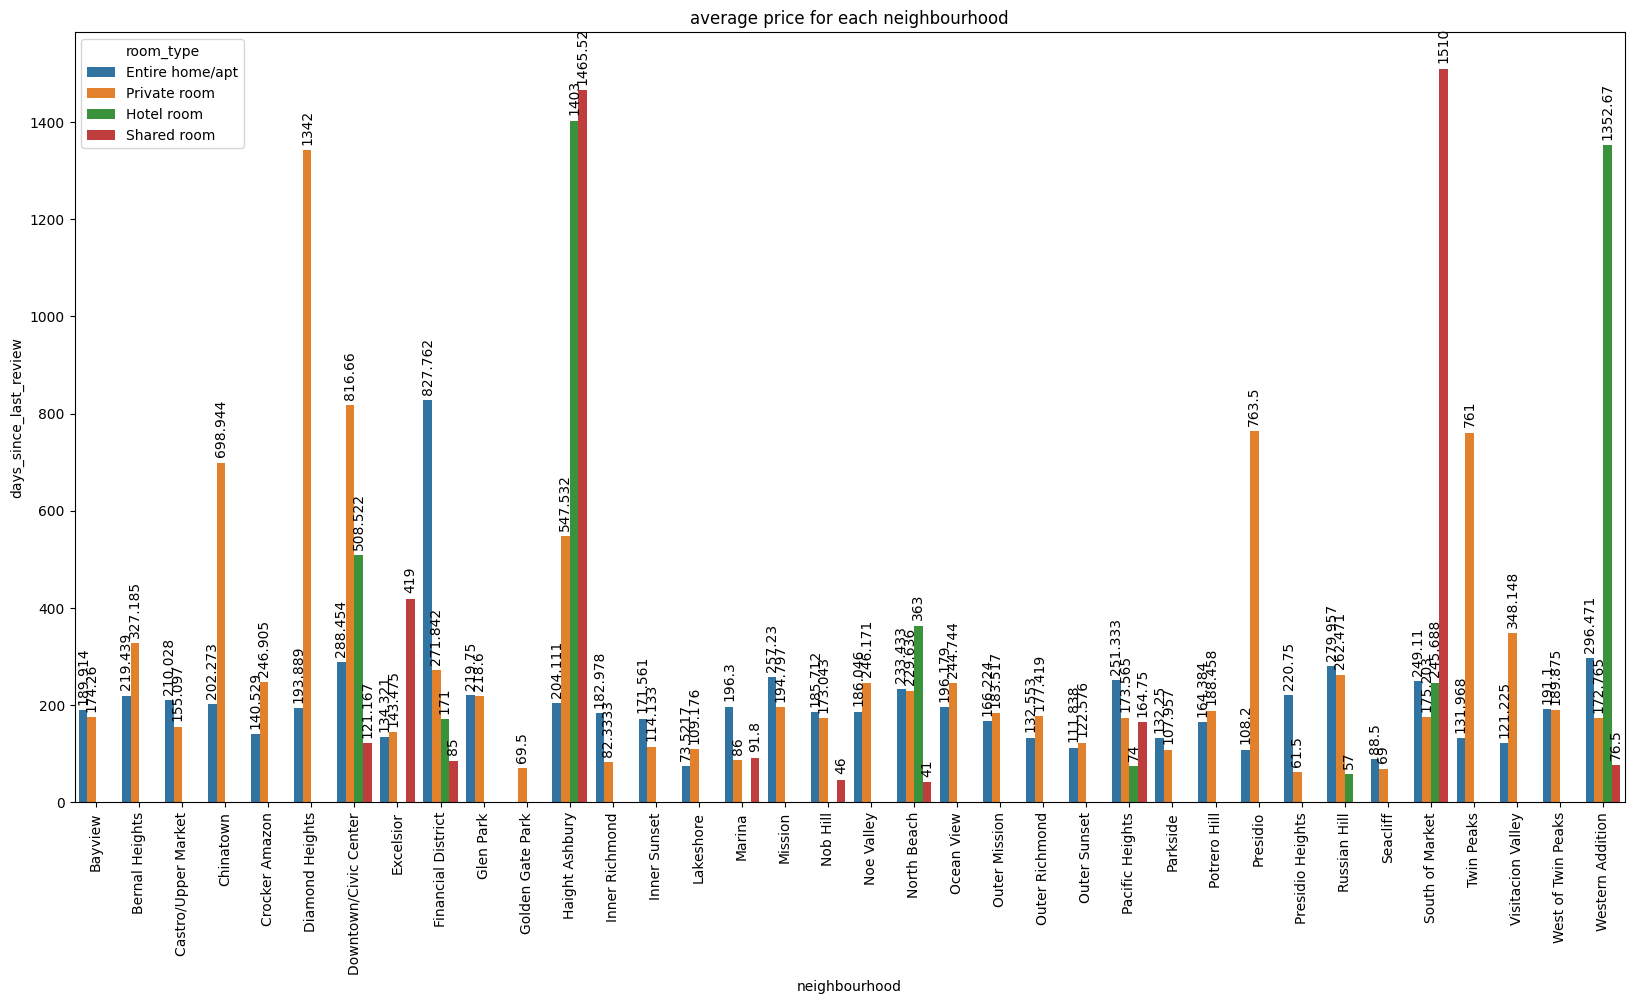

In [413]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x=df0['neighbourhood'],y=df0['days_since_last_review'],hue=df0['room_type'])
for i in range(4):
    ax.bar_label(ax.containers[i],rotation=90,padding=4)
plt.xticks(rotation=90)
plt.title('average price for each neighbourhood')

<Axes: >

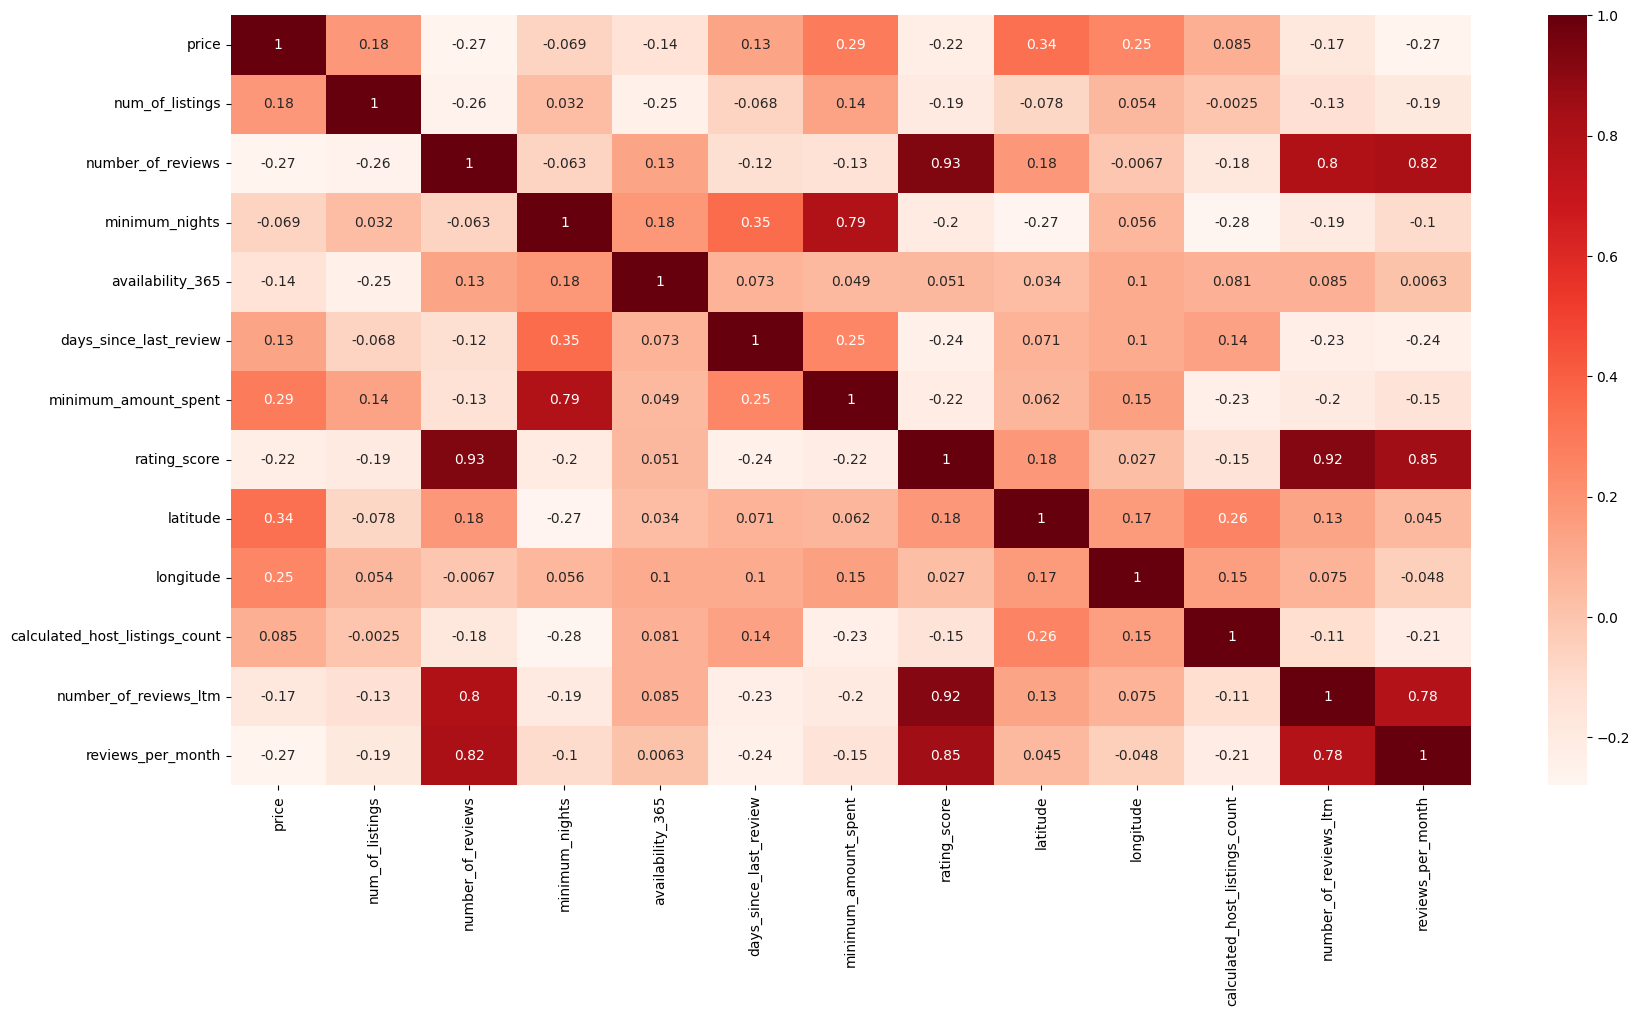

In [414]:
plt.figure(figsize=(20,10))
sns.heatmap(df0.corr(numeric_only=True),annot=True,cmap=sns.color_palette('Reds',as_cmap=True))

In [415]:
df0.to_csv('./mean_listings.csv')

Text(0.5, 1.0, 'Boxplot for longitude vs neighbourhood')

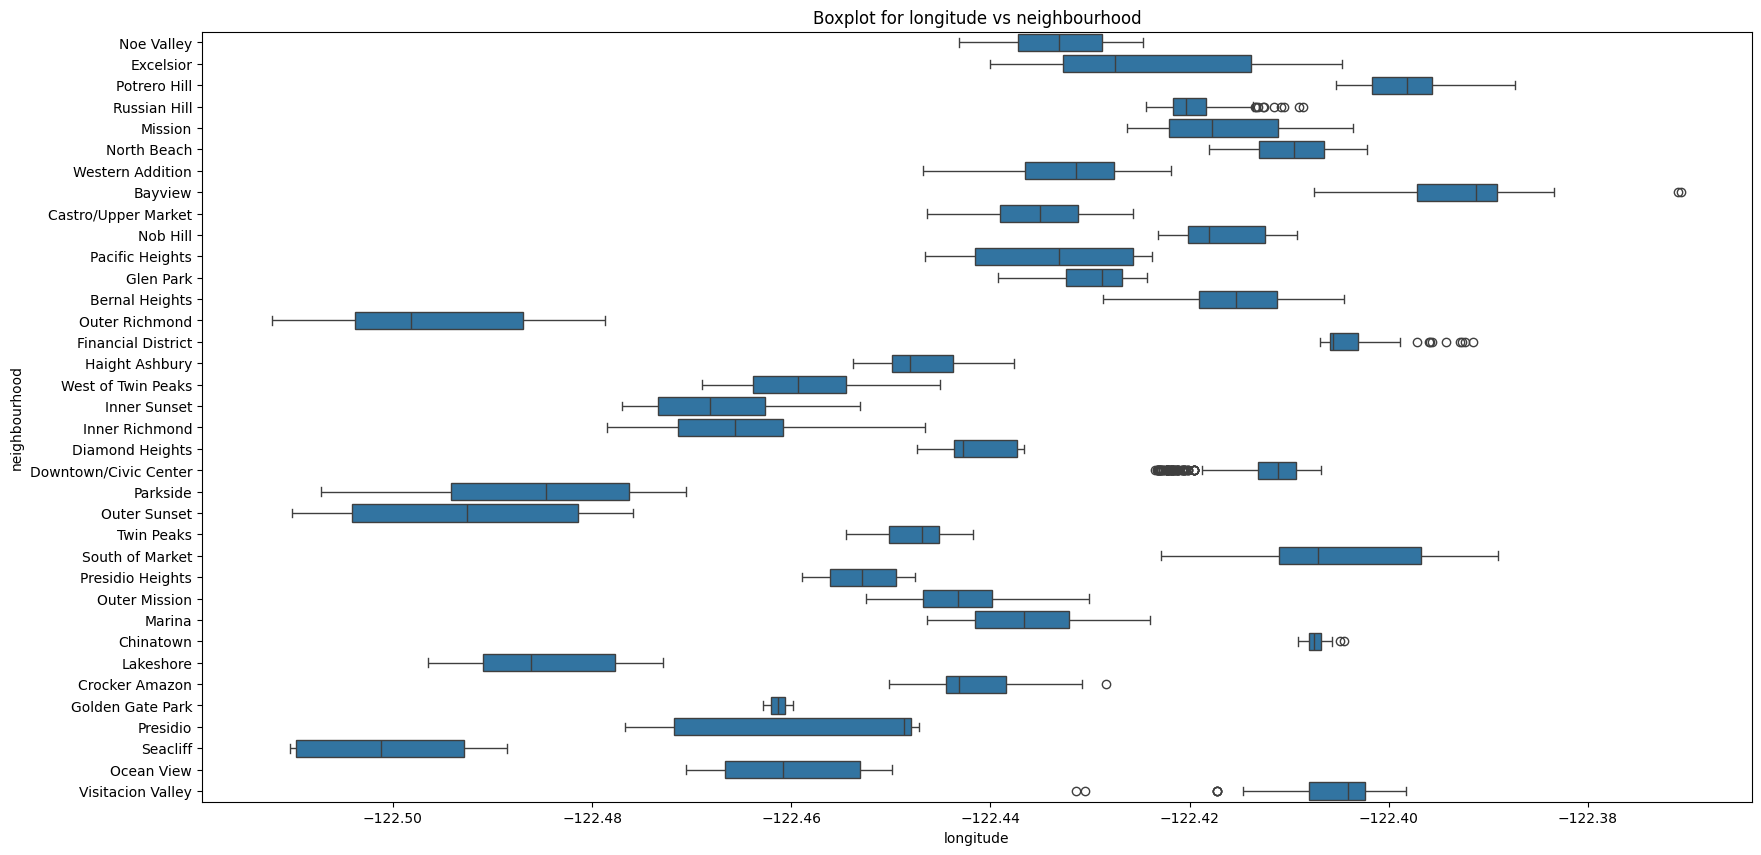

In [416]:
plt.figure(figsize=(20,10))
sns.boxplot(x = df['longitude'], y=df['neighbourhood'])
plt.title('Boxplot for longitude vs neighbourhood')

Text(0.5, 1.0, 'Boxplot for latitude vs neighbourhood')

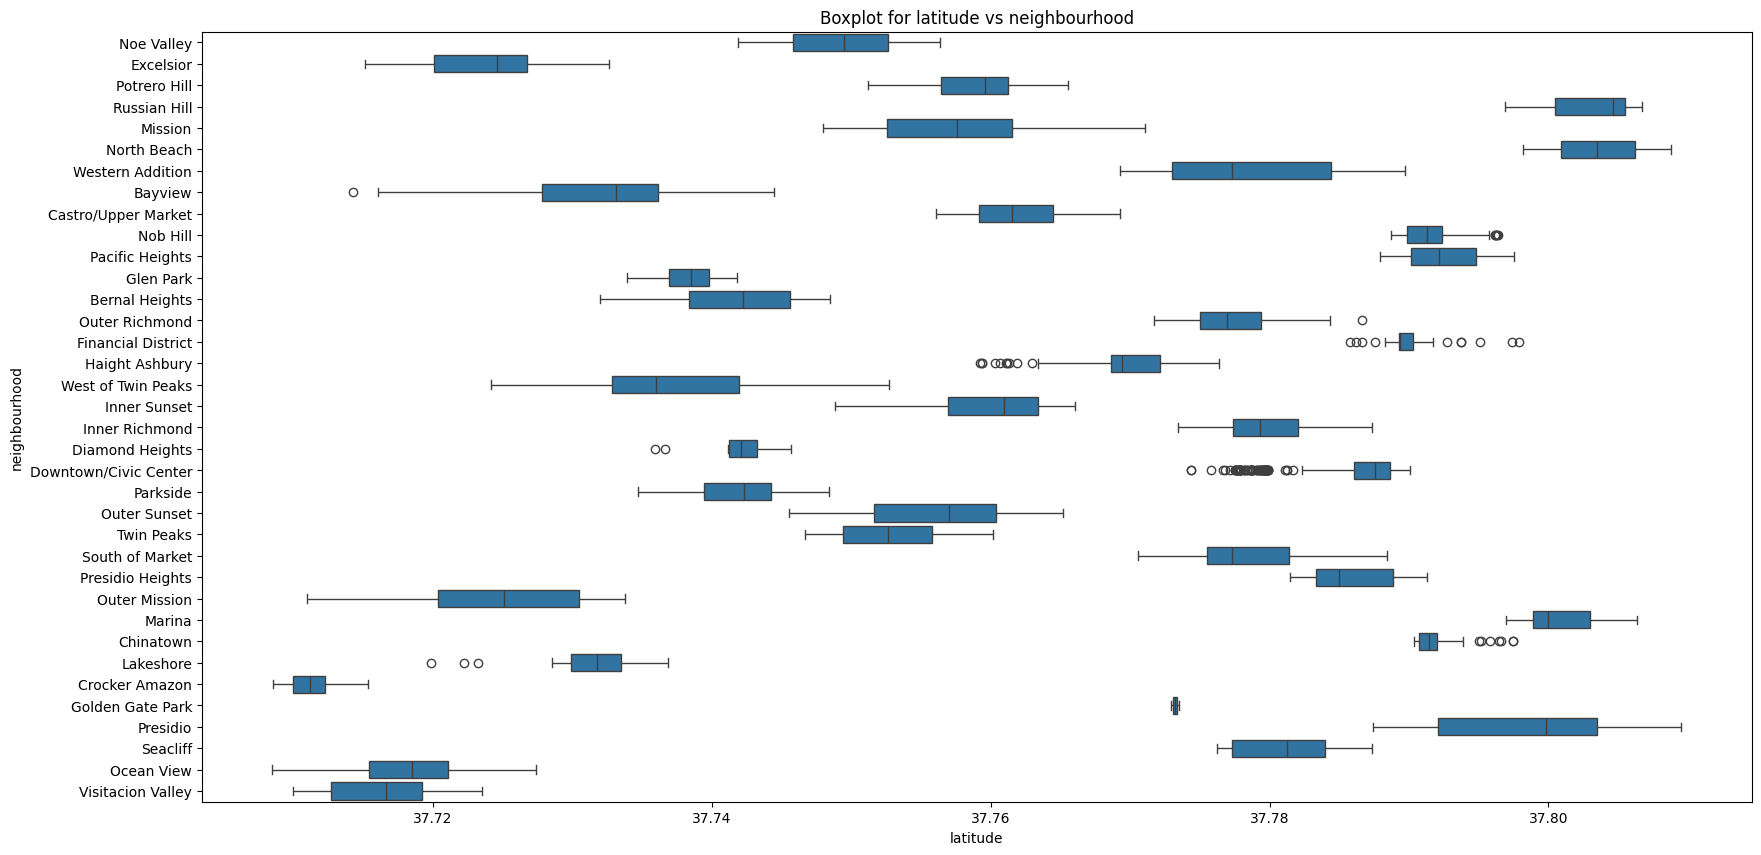

In [417]:
plt.figure(figsize=(20,10))
sns.boxplot(x = df['latitude'], y=df['neighbourhood'])
plt.title('Boxplot for latitude vs neighbourhood')

Text(0.5, 1.0, 'No. of listings in each neighbourhood')

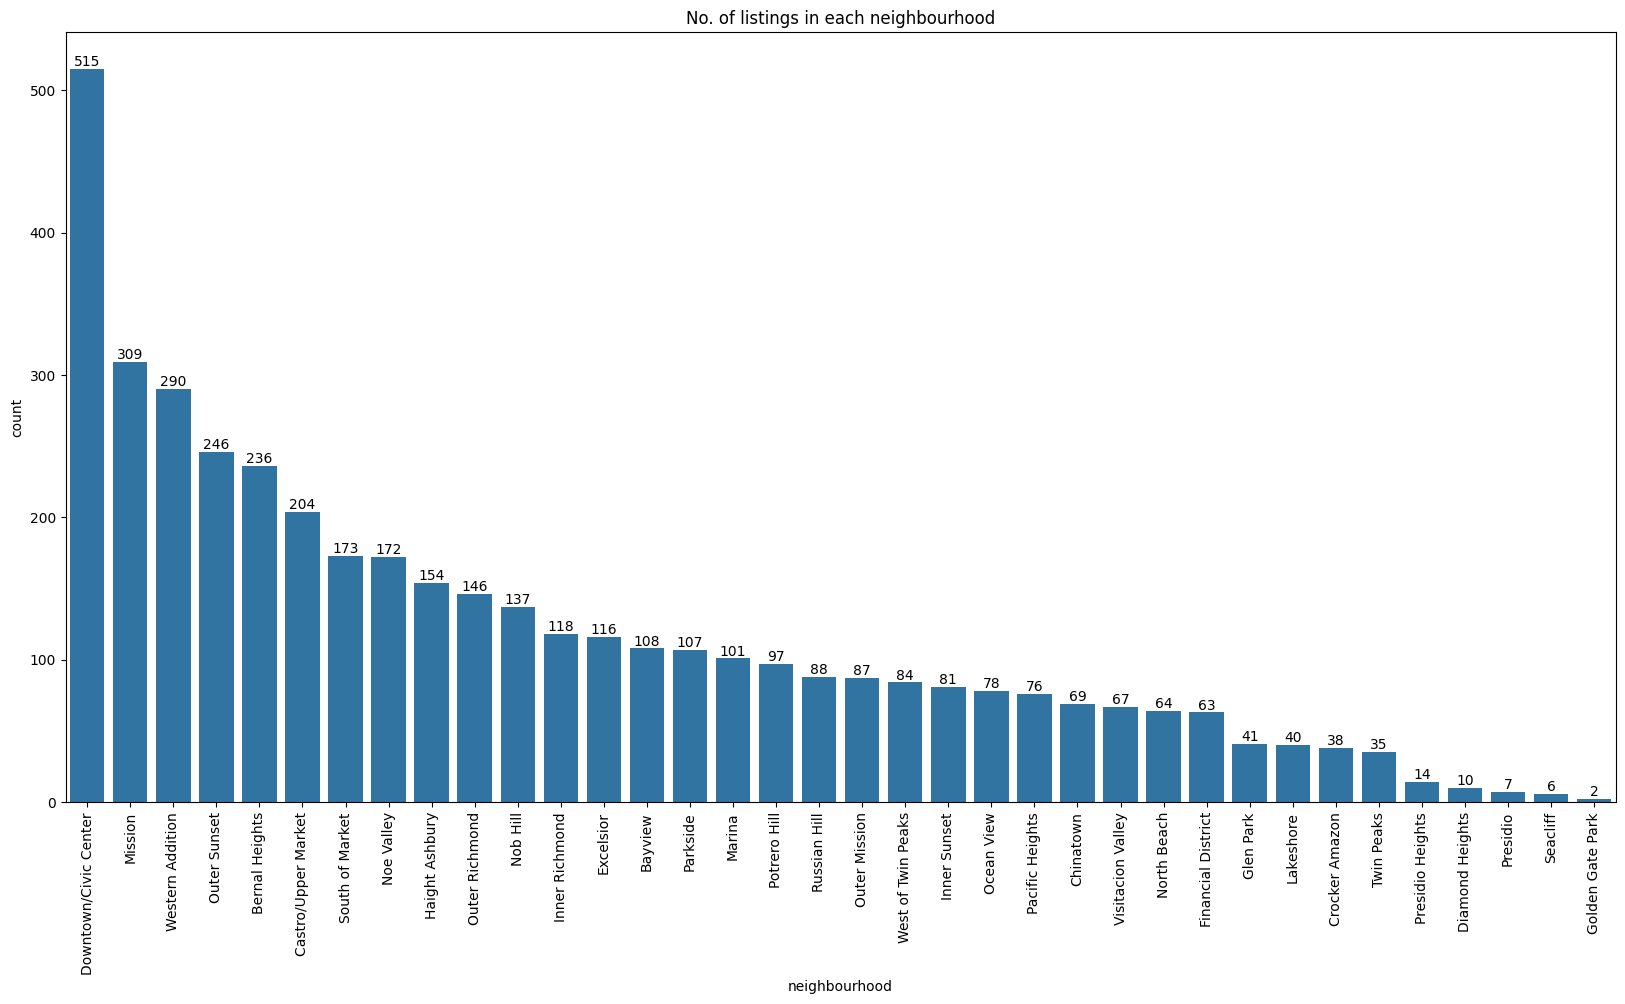

In [418]:
plt.figure(figsize=(20,10))
ax = sns.barplot(df['neighbourhood'].value_counts())
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 90)
plt.title('No. of listings in each neighbourhood')

In [419]:
df.to_csv('./listings_clean.csv')

In [420]:
df1 = df.drop(columns=['id','name','host_id','host_name','license','last_review','minimum_amount_spent'])
df1.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,days_since_last_review,rating_score
0,Noe Valley,37.75635,-122.42864,Entire home/apt,1250,5,34,0.23,1,80,2,145,0.234483
1,Excelsior,37.72369,-122.42865,Private room,79,2,149,1.92,1,196,20,57,2.614035
2,Potrero Hill,37.75622,-122.39821,Entire home/apt,249,5,36,0.26,1,202,7,176,0.204545
5,Russian Hill,37.80673,-122.41998,Entire home/apt,271,2,1,0.21,9,361,1,177,0.005650
8,Mission,37.75141,-122.41980,Entire home/apt,150,5,234,1.88,1,52,15,91,2.571429


<Axes: >

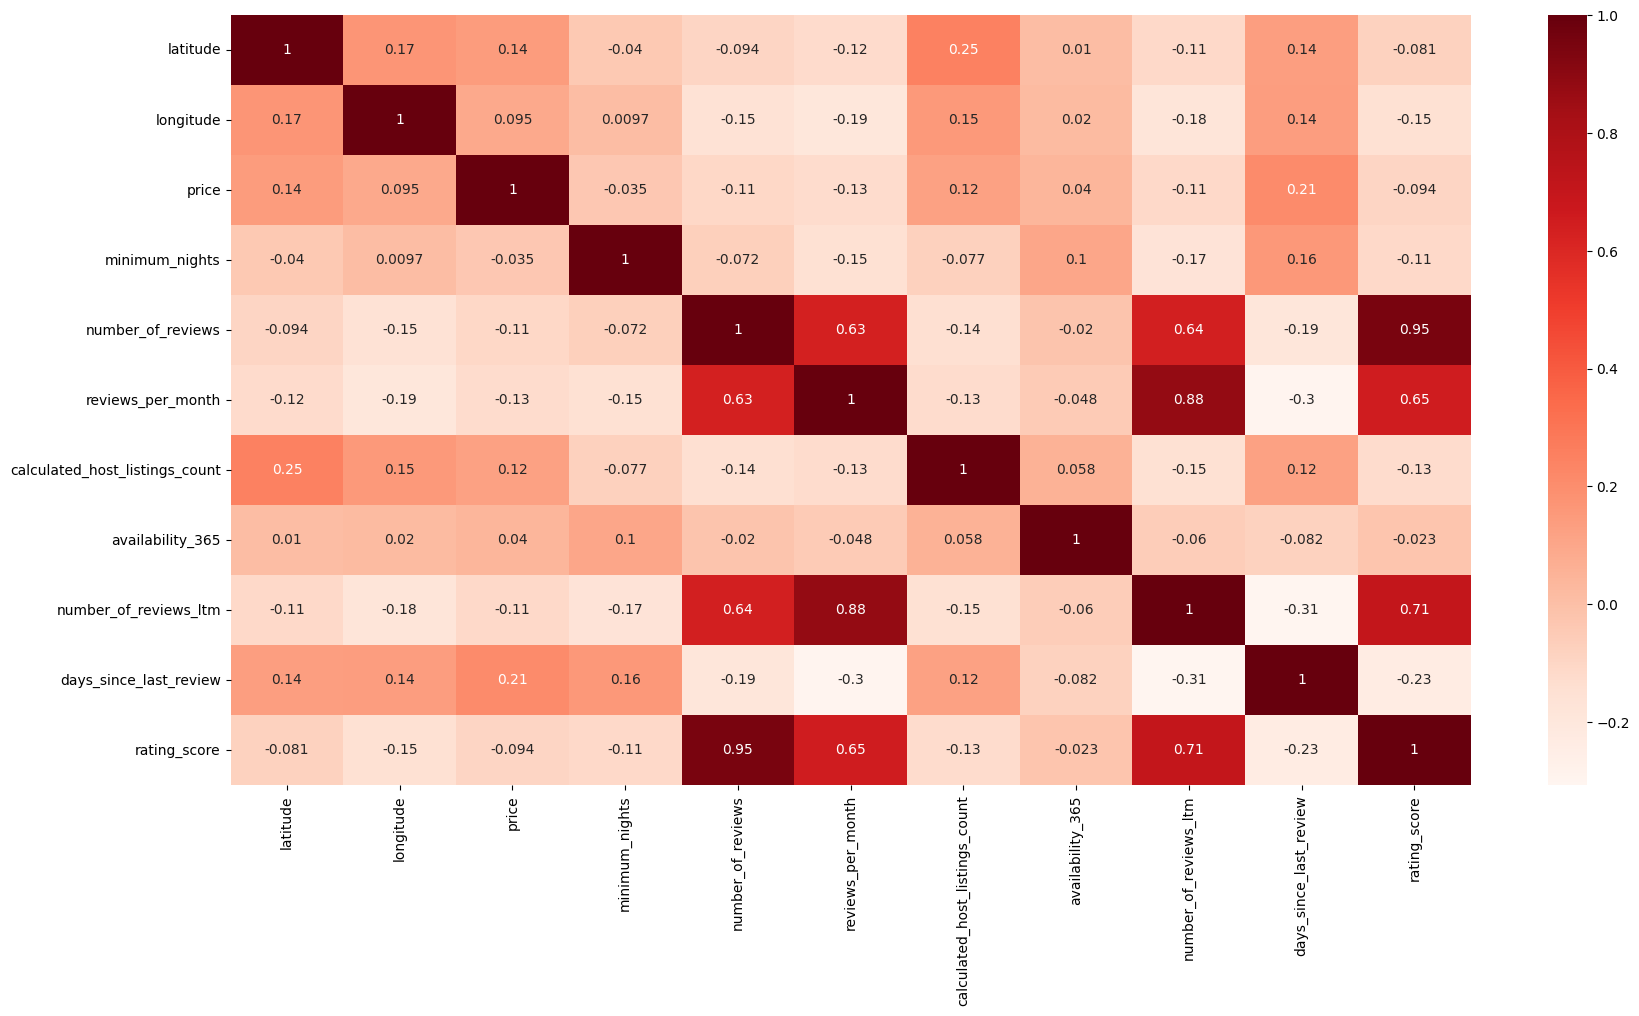

In [421]:
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(numeric_only=True),annot=True,cmap=sns.color_palette('Reds',as_cmap=True))

In [422]:
df1 = pd.get_dummies(df1)
df1.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,days_since_last_review,rating_score,neighbourhood_Bayview,neighbourhood_Bernal Heights,neighbourhood_Castro/Upper Market,neighbourhood_Chinatown,neighbourhood_Crocker Amazon,neighbourhood_Diamond Heights,neighbourhood_Downtown/Civic Center,neighbourhood_Excelsior,neighbourhood_Financial District,neighbourhood_Glen Park,neighbourhood_Golden Gate Park,neighbourhood_Haight Ashbury,neighbourhood_Inner Richmond,neighbourhood_Inner Sunset,neighbourhood_Lakeshore,neighbourhood_Marina,neighbourhood_Mission,neighbourhood_Nob Hill,neighbourhood_Noe Valley,neighbourhood_North Beach,neighbourhood_Ocean View,neighbourhood_Outer Mission,neighbourhood_Outer Richmond,neighbourhood_Outer Sunset,neighbourhood_Pacific Heights,neighbourhood_Parkside,neighbourhood_Potrero Hill,neighbourhood_Presidio,neighbourhood_Presidio Heights,neighbourhood_Russian Hill,neighbourhood_Seacliff,neighbourhood_South of Market,neighbourhood_Twin Peaks,neighbourhood_Visitacion Valley,neighbourhood_West of Twin Peaks,neighbourhood_Western Addition,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,37.75635,-122.42864,1250,5,34,0.23,1,80,2,145,0.234483,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,37.72369,-122.42865,79,2,149,1.92,1,196,20,57,2.614035,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,37.75622,-122.39821,249,5,36,0.26,1,202,7,176,0.204545,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False
5,37.80673,-122.41998,271,2,1,0.21,9,361,1,177,0.005650,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False
8,37.75141,-122.41980,150,5,234,1.88,1,52,15,91,2.571429,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [423]:
X = df1.drop(columns=['price'])
y = df1['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.2)
X_tr,X_val,y_tr,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=42)

In [424]:
scaler = StandardScaler().fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)

In [425]:
lr = LinearRegression()
lr.fit(X_tr_scaled,y_tr)

LinearRegression()

In [426]:
X_val_scaled = scaler.transform(X_val)

r_sq_val_tr = lr.score(X_val_scaled,y_val)

y_preds_val_lr = lr.predict(X_val_scaled)

r2_score_val_lr = r2_score(y_val,y_preds_val_lr)
mae_val_lr = mean_absolute_error(y_val,y_preds_val_lr)
mse_val_lr = mean_squared_error(y_val,y_preds_val_lr)
rmse_val_lr = np.sqrt(mse_val_lr)

In [427]:
dtr = DecisionTreeRegressor(random_state=42)
cv_params = {'max_depth':[None,3,4,5],
             'min_samples_leaf':[4,5,6],
             'min_samples_split':[1.0,2,3],
             }
dtr_cv = GridSearchCV(dtr,cv_params,cv=5)
dtr_cv.fit(X_tr_scaled,y_tr)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [None, 3, 4, 5],
                         'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [1.0, 2, 3]})

In [428]:
dtr_cv.best_params_

{'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [429]:
dtr_score = dtr_cv.best_score_
dtr_score

0.5700036668665576

In [430]:

y_preds_val_dtr = dtr_cv.best_estimator_.predict(X_val_scaled)

r2_score_val_dtr = r2_score(y_val,y_preds_val_dtr)
mae_val_dtr = mean_absolute_error(y_val,y_preds_val_dtr)
mse_val_dtr = mean_squared_error(y_val,y_preds_val_dtr)
rmse_val_dtr = np.sqrt(mse_val_dtr)

In [431]:
dtr_importances = pd.DataFrame(dtr_cv.best_estimator_.feature_importances_,columns=['importance'],index=df1.drop(columns=['price']).columns.values)
dtr_importances = dtr_importances.sort_values(by=['importance'],ascending=False)
dtr_importances

,importance
days_since_last_review,0.438923
availability_365,0.290369
calculated_host_listings_count,0.216184
longitude,0.023154
latitude,0.013117
room_type_Entire home/apt,0.012635
reviews_per_month,0.003617
minimum_nights,0.002001
neighbourhood_Ocean View,0.000000
neighbourhood_Presidio Heights,0.000000


<Axes: xlabel='importance', ylabel='None'>

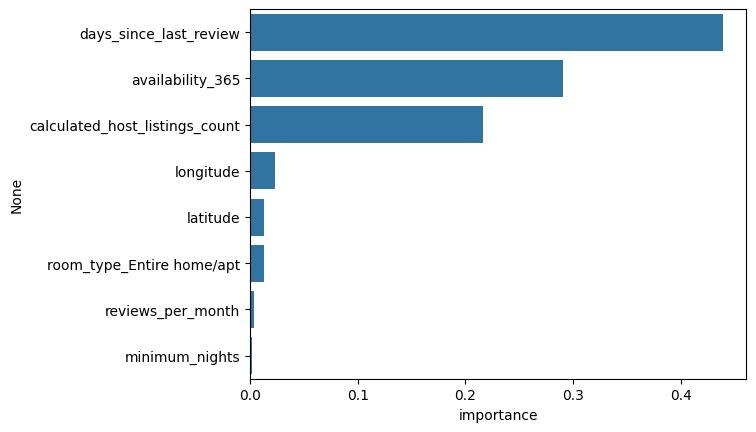

In [432]:
dtr_importances = dtr_importances[dtr_importances['importance'] > 0]
sns.barplot(x = dtr_importances['importance'],y=dtr_importances.index)

In [433]:
rfr = RandomForestRegressor(random_state=42)
rfr_cv = GridSearchCV(rfr,cv_params,cv=5)
rfr_cv.fit(X_tr_scaled,y_tr)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 3, 4, 5],
                         'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [1.0, 2, 3]})

In [434]:
rfr_cv.best_params_

{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [435]:
rfr_score = rfr_cv.best_score_
rfr_score

0.35270879871024385

In [436]:
y_preds_val_rfr = rfr_cv.best_estimator_.predict(X_val_scaled)
r2_score_val_rfr = r2_score(y_val,y_preds_val_rfr)
mae_val_rfr = mean_absolute_error(y_val,y_preds_val_rfr)
mse_val_rfr = mean_squared_error(y_val,y_preds_val_rfr)
rmse_val_rfr = np.sqrt(mse_val_rfr)
result = pd.DataFrame(data={'metric':['coefficient of determination','R2 Score','Mean Absolute Error','Mean Squared Error', 'Root Mean Squared Error'],
                                'linear regression':[r_sq_val_tr,r2_score_val_lr,mae_val_lr,mse_val_lr,rmse_val_lr],
                                'Decision Tree Regressor':[dtr_score,r2_score_val_dtr,mae_val_dtr,mse_val_dtr,rmse_val_dtr],
                                'Random Forest Regressor':[rfr_score,r2_score_val_rfr,mae_val_rfr,mse_val_rfr,rmse_val_rfr]})

In [437]:
rfr_importances = pd.DataFrame(rfr_cv.best_estimator_.feature_importances_, columns=['importance'],index=df1.drop(columns=['price']).columns.values)
rfr_importances = rfr_importances.sort_values(by=['importance'],ascending=False)
rfr_importances

,importance
days_since_last_review,4.523341e-01
calculated_host_listings_count,2.317551e-01
availability_365,1.111706e-01
longitude,5.616352e-02
latitude,4.536700e-02
rating_score,3.033019e-02
reviews_per_month,2.871605e-02
room_type_Entire home/apt,9.987628e-03
number_of_reviews,9.931569e-03
neighbourhood_Financial District,7.747881e-03


<Axes: xlabel='importance', ylabel='None'>

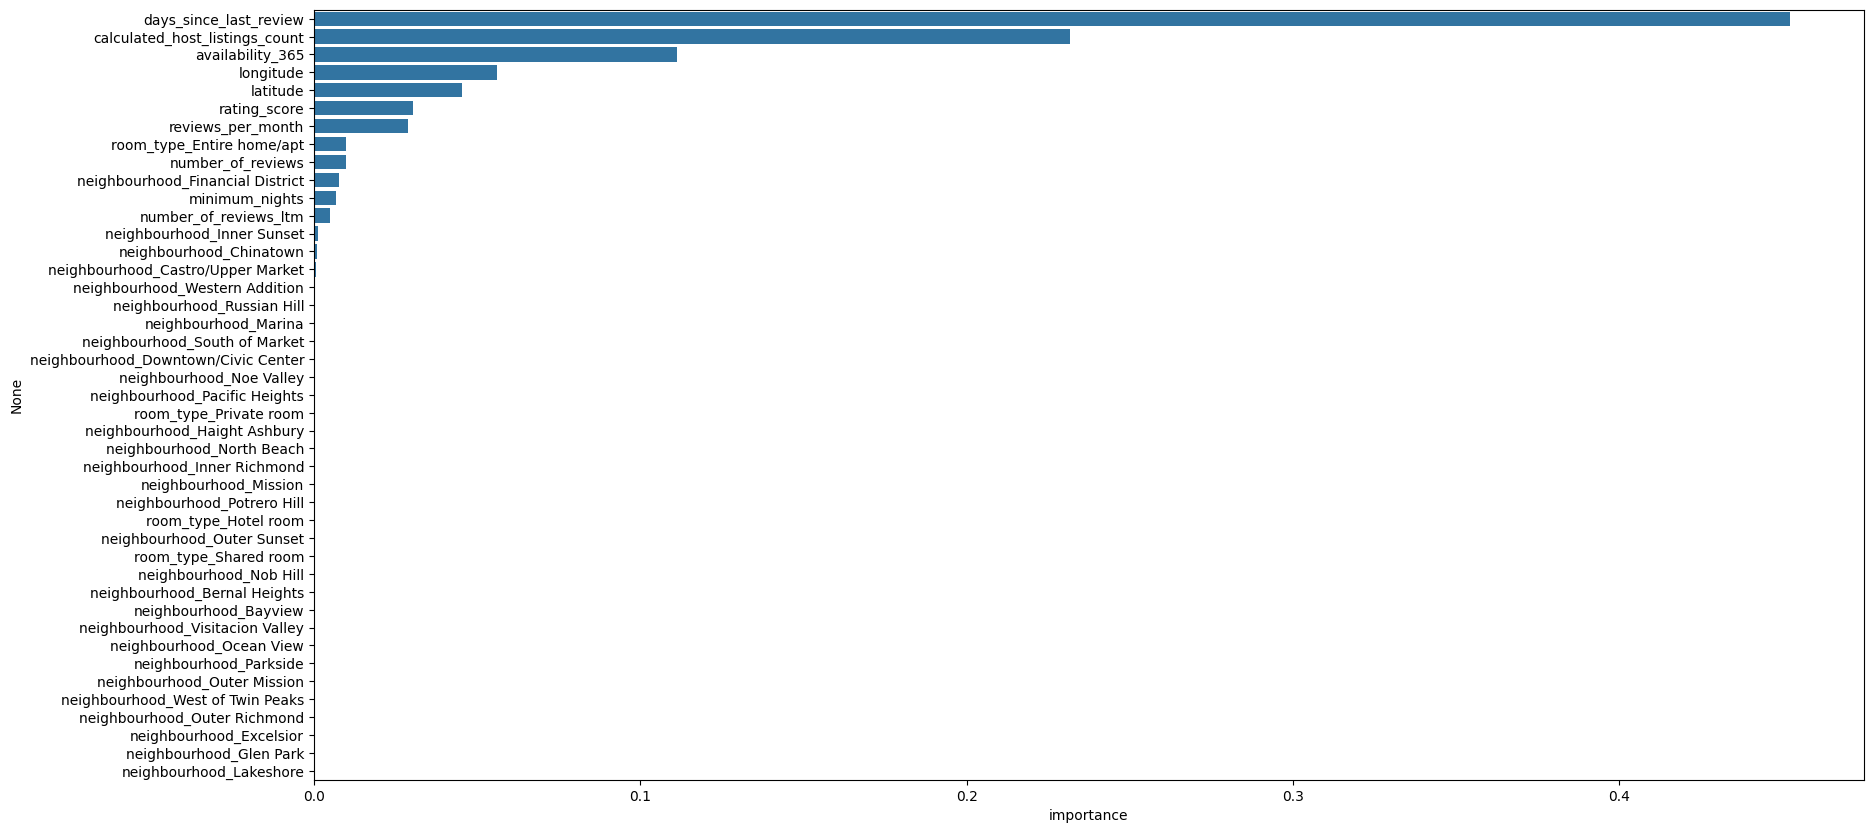

In [438]:
plt.figure(figsize=(20,10))
rfr_importances = rfr_importances[rfr_importances['importance'] > 0]
sns.barplot(x = rfr_importances['importance'],y=rfr_importances.index)

In [439]:
result

,metric,linear regression,Decision Tree Regressor,Random Forest Regressor
0,coefficient of determination,0.110173,0.570004,0.352709
1,R2 Score,0.110173,0.766244,0.638989
2,Mean Absolute Error,304.270665,157.609728,174.341486
3,Mean Squared Error,959722.645793,252117.013248,389368.834684
4,Root Mean Squared Error,979.654350,502.112550,623.994259


In [440]:
pickle.dump(lr, open('./lr_model.pickle','wb'))
pickle.dump(dtr_cv, open('./dtr_cv_model.pickle','wb'))
pickle.dump(rfr_cv, open('./rfr_cv_model.pickle','wb'))

In [441]:
X_test_scaled = scaler.transform(X_test)
y_preds_test_rfr = rfr_cv.best_estimator_.predict(X_test_scaled)
r2_score_test_rfr = r2_score(y_test,y_preds_test_rfr)
mae_test_rfr = mean_absolute_error(y_test, y_preds_test_rfr)
mse_test_rfr = mean_squared_error(y_test,y_preds_test_rfr)
rmse_test_rfr = np.sqrt(mse_test_rfr)
test_results = pd.DataFrame(data={'metric':['R2 Score','Mean Absolute Error','Mean Squared Error', 'Root Mean Squared Error'],
                                'Random Forest Regressor':[r2_score_test_rfr,mae_test_rfr,mse_test_rfr,rmse_test_rfr]})
test_results

,metric,Random Forest Regressor
0,R2 Score,0.743992
1,Mean Absolute Error,162.558990
2,Mean Squared Error,228885.903551
3,Root Mean Squared Error,478.420216


In [442]:
residuals = pd.DataFrame(data={
    'actual':y_test,
    'predicted':y_preds_test_rfr,
    'residual':y_test - y_preds_test_rfr
})
residuals

,actual,predicted,residual
1906,227,185.190025,41.809975
1744,115,254.389622,-139.389622
3637,225,542.105687,-317.105687
1200,1213,1011.218794,201.781206
5769,126,295.484013,-169.484013
...,...,...,...
5171,61,123.797012,-62.797012
2922,122,131.247917,-9.247917
1371,160,184.997173,-24.997173
5807,90,127.728428,-37.728428


<Axes: xlabel='actual', ylabel='predicted'>

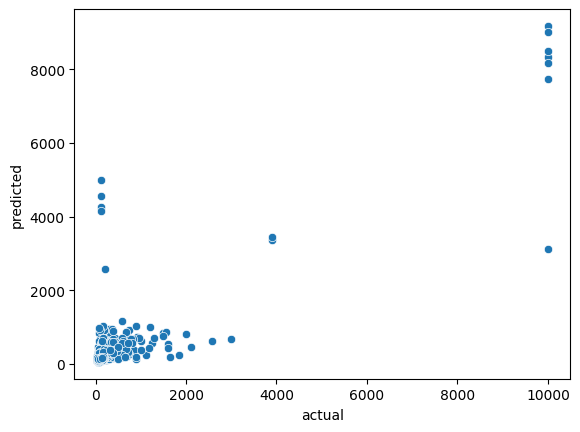

In [443]:
sns.scatterplot(x='actual',y='predicted',data=residuals)

In [444]:
residuals['residual'].agg(['min','max'])

min   -4874.068464
max    6890.697462
Name: residual, dtype: float64

In [445]:
np.mean(residuals['actual'])

327.92224880382776

In [446]:
np.std(residuals['actual'])

945.546977183056

<Axes: xlabel='residual', ylabel='Count'>

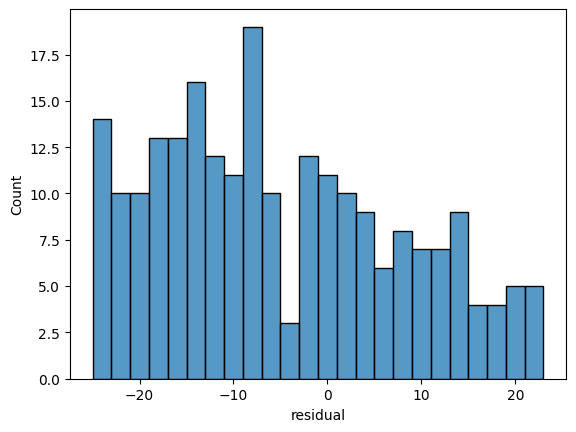

In [447]:
sns.histplot(residuals['residual'],bins=np.arange(-25,25,2))